## Library

In [1]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io.wavfile
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
import os

In [186]:
# folder = os.listdir('data')
# files = []
# for i in range(0,len(folder)):
#     files.append(os.listdir(f'data/{folder[i]}'))


# files_concat = []
# for sublist in files:
#     for item in sublist:
#         files_concat.append(item)


# # files_concat

# files_concat_tanpa_csv = [filesname.replace('.csv', '') for filesname in files_concat]

# files_concat_tanpa_csv

# Aqu

In [187]:
# amel_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/amel_pulse_tkr.csv",sep =";")


In [2]:
path_file = os.listdir('data/data_fix/')
label = [filesname.replace('.csv', '') for filesname in path_file]

# label
file = {}
for no_label in label:
    data = pd.read_csv(f'data/data_fix/{no_label}.csv')
    file[no_label] = data
    globals()[no_label] = data


In [189]:
# for i,j in zip(file,label):
#     i.to_csv(f'data/data_fix/{j}.csv')

In [25]:
window_size = 2000
window_step = 2000


file_segmen = []
for no_segmen in range(0,len(label)):
    file[label[no_segmen]].columns = ["num","ir","waktu"]
    path1 = file[label[no_segmen]][(file[label[no_segmen]].waktu >10)]
    path1 = path1[(path1.waktu <=190)]
    
    for no_window in range(0,len(path1),window_step):
        window = path1[no_window:no_window+window_size]
        file_segmen.append(window)

In [36]:
minmaxx = []
signals = []
info = []
data_var = []
data_std = []
for no_minmax in range(0,len(file_segmen)):
    minmax = MinMaxScaler(feature_range=(0,1))
    
    path_minmax1 = minmax.fit_transform(file_segmen[no_minmax])
    path_minmax_seg1 = pd.DataFrame(path_minmax1)[1]

    signals1, info1 = nk.ppg_process(path_minmax_seg1, sampling_rate=100)

    minmaxx.append(path_minmax_seg1)
    signals.append(signals1)
    info.append(info1)

    data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
    data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\3960463865.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\3960463865.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\3960463865.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\3960463865.py:19: FutureWarning: Calling float on a single element Series is deprecated and w

In [32]:
analyze_signals = []
bpm = []
hrv = []
for no_analyze in range(0,len(file_segmen)):
    analyze_signals1 = nk.ppg_analyze(signals[no_analyze], sampling_rate=100)

    analyze_signals.append(analyze_signals1)
    bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
    hrv.append(float(analyze_signals1['HRV_MeanNN']))

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\complexity\entropy_multiscale.py:351: RuntimeWarning: invalid value encountered in scalar divide
  mse = np.trapz(mse) / len(mse)
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\1363301538.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
C:\Us

In [41]:
ppg_elgendi = []
for no_ppgelgendi in range(0,len(file_segmen)): 
        ppg_elgendi1 = nk.ppg_clean(minmaxx[no_ppgelgendi], sampling_rate=100, method='elgendi')
        ppg_elgendi.append(ppg_elgendi1)

## sistol, diastol, distance

In [44]:
sistol = []
diastol = []
distance = []

for no_sisdis in range(0,len(file_segmen)):  
    path = ppg_elgendi[no_sisdis]
    med = path.max()/4
    sistol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] > med:
            sistol1.append(i)


    diastol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] < med:
            diastol1.append(i)

    sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
    diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
    distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\514987734.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\514987734.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10820\514987734.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))


In [48]:
dataajah = {'BPM4':bpm,'HRV4':hrv,'VAR4':data_var,'STD4':data_std,'SISTOL4':sistol,'DIASTOL4':diastol,'DISTANCE4':distance}

In [50]:
dataaaaa = pd.DataFrame(dataajah)

In [51]:
label

['aldi_tkr',
 'alikha_pulse_tkr',
 'amel_pulse_tkr',
 'andika_pulse_tkr',
 'anita_pulse_tkr',
 'ary_tkr',
 'betari_tkr',
 'bunga_tkr',
 'charisma_tkr',
 'deva_tkr',
 'ecak_pulse_tkr',
 'faiza_tkr',
 'fauzi_pulse_tkr',
 'hilmy_tkr',
 'ilma_tkr',
 'izmi_tkr',
 'kanwa_pulse_tkr',
 'maha_tkr',
 'nandakkn_pulse_tkr',
 'nanda_pulse_tkr',
 'nasah_pulse_tkr',
 'nisa_tkr',
 'novi_tkr',
 'nyoman_pulse_tkr',
 'nyu_pulse_tkr',
 'pradja_pulse_tkr',
 'puci_pulse_tkr',
 'raihan_pulse_tkr',
 'rima_tkr',
 'roshied_pulse_tkr',
 'silvia_pulse_tkr',
 'widi_pulse_tkr',
 'winanda_tkr']

In [ ]:
bpm1 = []
hrv1 = []
var1 = []
std1 = []
sistol1 = []
diastol1 = []
distance1 = []
peak_elgendi1 = []
for j in range(0,len(label)):
    file[label[j]].columns = ["num","ir","waktu"]
    path1 = file[label[j]][(file[label[j]].waktu >10)]
    path1 = path1[(path1.waktu <=70)]

    minmax = MinMaxScaler(feature_range=(0,1))

    path_minmax1 = minmax.fit_transform(path1)
    path_minmax_seg1 = pd.DataFrame(path_minmax1)[1]

    signals1, info1 = nk.ppg_process(path_minmax_seg1, sampling_rate=100)
    analyze_signals1 = nk.ppg_analyze(signals1, sampling_rate=100)

    ppg_elgendi1 = nk.ppg_clean(path_minmax_seg1, sampling_rate=100, method='elgendi')
    med = ppg_elgendi1.max()/4

    sistol = []
    for i in range(1, len(ppg_elgendi1) - 1):
        if ppg_elgendi1[i] > ppg_elgendi1[i - 1] and ppg_elgendi1[i] > ppg_elgendi1[i + 1] and ppg_elgendi1[i] > med:
            sistol.append(i)


    diastol = []
    for i in range(1, len(ppg_elgendi1) - 1):
        if ppg_elgendi1[i] > ppg_elgendi1[i - 1] and ppg_elgendi1[i] > ppg_elgendi1[i + 1] and ppg_elgendi1[i] < med:
            diastol.append(i)


    peaks, info = nk.ppg_peaks(ppg_elgendi1, sampling_rate=100, method="elgendi", show=False)
    

    bpm1.append(float(analyze_signals1['PPG_Rate_Mean']))
    hrv1.append(float(analyze_signals1['HRV_MeanNN']))
    var1.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
    std1.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))
    sistol1.append(float(pd.DataFrame(ppg_elgendi1[sistol]).mean()))
    diastol1.append(float(pd.DataFrame(ppg_elgendi1[diastol]).mean()))
    distance1.append(float(pd.DataFrame(ppg_elgendi1[sistol]).mean())-float(pd.DataFrame(ppg_elgendi1[diastol]).mean()))
    peak_elgendi1.append(float(pd.DataFrame(ppg_elgendi1[peaks]).mean()))

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8512\614934988.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm1.append(float(analyze_signals1['PPG_Rate_Mean']))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8512\614934988.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv1.append(float(analyze_signals1['HRV_MeanNN']))
C:\Users\MY ASUS\App

In [ ]:
bpm2 = []
hrv2 = []
var2 = []
std2 = []
sistol2 = []
diastol2 = []
distance2 = []
peak_elgendi2 = []
for i in file:
    i.columns = ["ir","waktu"]

    path2 = i[(i.waktu >70)]    
    path2 = path2[(path2.waktu <=120)]

    minmax = MinMaxScaler(feature_range=(0,1))

    path_minmax2 = minmax.fit_transform(path2)
    path_minmax_seg2 = pd.DataFrame(path_minmax2)[0]

    signals2, info2 = nk.ppg_process(path_minmax_seg2, sampling_rate=100)
    analyze_signals2 = nk.ppg_analyze(signals2, sampling_rate=100)

    ppg_elgendi2 = nk.ppg_clean(path_minmax_seg2, sampling_rate=100, method='elgendi')
    med = ppg_elgendi2.max()/4

    sistol = []
    for i in range(1, len(ppg_elgendi2) - 1):
        if ppg_elgendi2[i] > ppg_elgendi2[i - 1] and ppg_elgendi2[i] > ppg_elgendi2[i + 1] and ppg_elgendi2[i] > med:
            sistol.append(i)


    diastol = []
    for i in range(1, len(ppg_elgendi2) - 1):
        if ppg_elgendi2[i] > ppg_elgendi2[i - 1] and ppg_elgendi2[i] > ppg_elgendi2[i + 1] and ppg_elgendi2[i] < med:
            diastol.append(i)


    peaks, info = nk.ppg_peaks(ppg_elgendi2, sampling_rate=100, method="elgendi", show=False)
    

    bpm2.append(float(analyze_signals2['PPG_Rate_Mean']))
    hrv2.append(float(analyze_signals2['HRV_MeanNN']))
    var2.append(float(pd.DataFrame(info2['PPG_Peaks']).diff().var()))
    std2.append(float(pd.DataFrame(info2['PPG_Peaks']).diff().std()))
    sistol2.append(float(pd.DataFrame(ppg_elgendi2[sistol]).mean()))
    diastol2.append(float(pd.DataFrame(ppg_elgendi2[diastol]).mean()))
    distance2.append(float(pd.DataFrame(ppg_elgendi2[sistol]).mean())-float(pd.DataFrame(ppg_elgendi2[diastol]).mean()))
    peak_elgendi2.append(float(pd.DataFrame(ppg_elgendi2[peaks]).mean()))

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_7364\1146923657.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm2.append(float(analyze_signals2['PPG_Rate_Mean']))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_7364\1146923657.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv2.append(float(analyze_signals2['HRV_MeanNN']))
C:\Users\MY ASUS\A

# 0-60

In [ ]:
def aqu60(path):
    path.columns = ["ir","waktu"]

    path1 = path[(path.waktu >10)]
    path1 = path1[(path1.waktu <=70)]

    minmax = MinMaxScaler(feature_range=(0,1))

    path_minmax1 = minmax.fit_transform(path1)
    path_minmax_seg1 = pd.DataFrame(path_minmax1)[0]

    signals1, info1 = nk.ppg_process(path_minmax_seg1, sampling_rate=100)
    analyze_signals1 = nk.ppg_analyze(signals1, sampling_rate=100)

    ppg_elgendi1 = nk.ppg_clean(path_minmax_seg1, sampling_rate=100, method='elgendi')
    med = ppg_elgendi1.max()/4

    sistol = []
    for i in range(1, len(ppg_elgendi1) - 1):
        if ppg_elgendi1[i] > ppg_elgendi1[i - 1] and ppg_elgendi1[i] > ppg_elgendi1[i + 1] and ppg_elgendi1[i] > med:
            sistol.append(i)


    diastol = []
    for i in range(1, len(ppg_elgendi1) - 1):
        if ppg_elgendi1[i] > ppg_elgendi1[i - 1] and ppg_elgendi1[i] > ppg_elgendi1[i + 1] and ppg_elgendi1[i] < med:
            diastol.append(i)


    peaks, info = nk.ppg_peaks(ppg_elgendi1, sampling_rate=100, method="elgendi", show=False)
    

    bpm1 = float(analyze_signals1['PPG_Rate_Mean'])
    hrv1 = float(analyze_signals1['HRV_MeanNN'])
    var1 = float(pd.DataFrame(info1['PPG_Peaks']).diff().var())
    std1 = float(pd.DataFrame(info1['PPG_Peaks']).diff().std())
    sistol1 = float(pd.DataFrame(ppg_elgendi1[sistol]).mean())
    diastol1 = float(pd.DataFrame(ppg_elgendi1[diastol]).mean())
    distance1 = sistol1-diastol1
    peak_elgendi1 = float(pd.DataFrame(ppg_elgendi1[peaks]).mean())



    return bpm1,hrv1,var1,std1,sistol1,diastol1,distance1,peak_elgendi1

## RUN

In [ ]:
amel_pulse_tkr_bpm1,amel_pulse_tkr_hrv1,amel_pulse_tkr_var1,amel_pulse_tkr_std1,amel_pulse_tkr_sistol1,amel_pulse_tkr_diastol1,amel_pulse_tkr_distance1,amel_pulse_tkr_peakelgendi1 = aqu60(amel_pulse_tkr)
andika_pulse_tkr_bpm1,andika_pulse_tkr_hrv1,andika_pulse_tkr_var1,andika_pulse_tkr_std1,andika_pulse_tkr_sistol1,andika_pulse_tkr_diastol1,andika_pulse_tkr_distance1,andika_pulse_tkr_peakelgendi1, = aqu60(andika_pulse_tkr)
fauzi_pulse_tkr_bpm1,fauzi_pulse_tkr_hrv1,fauzi_pulse_tkr_var1,fauzi_pulse_tkr_std1,fauzi_pulse_tkr_sistol1,fauzi_pulse_tkr_diastol1,fauzi_pulse_tkr_distance1,fauzi_pulse_tkr_peakelgendi1, = aqu60(fauzi_pulse_tkr)
kanwa_pulse_tkr_bpm1,kanwa_pulse_tkr_hrv1,kanwa_pulse_tkr_var1,kanwa_pulse_tkr_std1,kanwa_pulse_tkr_sistol1,kanwa_pulse_tkr_diastol1,kanwa_pulse_tkr_distance1,kanwa_pulse_tkr_peakelgendi1, = aqu60(kanwa_pulse_tkr)
nandakkn_pulse_tkr_bpm1,nandakkn_pulse_tkr_hrv1,nandakkn_pulse_tkr_var1,nandakkn_pulse_tkr_std1,nandakkn_pulse_tkr_sistol1,nandakkn_pulse_tkr_diastol1,nandakkn_pulse_tkr_distance1,nandakkn_pulse_tkr_peakelgendi1, = aqu60(nandakkn_pulse_tkr)
nanda_pulse_tkr_bpm1,nanda_pulse_tkr_hrv1,nanda_pulse_tkr_var1,nanda_pulse_tkr_std1,nanda_pulse_tkr_sistol1,nanda_pulse_tkr_diastol1,nanda_pulse_tkr_distance1,nanda_pulse_tkr_peakelgendi1, = aqu60(nanda_pulse_tkr)
pradja_pulse_tkr_bpm1,pradja_pulse_tkr_hrv1,pradja_pulse_tkr_var1,pradja_pulse_tkr_std1,pradja_pulse_tkr_sistol1,pradja_pulse_tkr_diastol1,pradja_pulse_tkr_distance1,pradja_pulse_tkr_peakelgendi1, = aqu60(pradja_pulse_tkr)
raihan_pulse_tkr_bpm1,raihan_pulse_tkr_hrv1,raihan_pulse_tkr_var1,raihan_pulse_tkr_std1,raihan_pulse_tkr_sistol1,raihan_pulse_tkr_diastol1,raihan_pulse_tkr_distance1,raihan_pulse_tkr_peakelgendi1, = aqu60(raihan_pulse_tkr)
silvia_pulse_tkr_bpm1,silvia_pulse_tkr_hrv1,silvia_pulse_tkr_var1,silvia_pulse_tkr_std1,silvia_pulse_tkr_sistol1,silvia_pulse_tkr_diastol1,silvia_pulse_tkr_distance1,silvia_pulse_tkr_peakelgendi1, = aqu60(silvia_pulse_tkr)
alikha_pulse_tkr_bpm1,alikha_pulse_tkr_hrv1,alikha_pulse_tkr_var1,alikha_pulse_tkr_std1,alikha_pulse_tkr_sistol1,alikha_pulse_tkr_diastol1,alikha_pulse_tkr_distance1,alikha_pulse_tkr_peakelgendi1, = aqu60(alikha_pulse_tkr)
anita_pulse_tkr_bpm1,anita_pulse_tkr_hrv1,anita_pulse_tkr_var1,anita_pulse_tkr_std1,anita_pulse_tkr_sistol1,anita_pulse_tkr_diastol1,anita_pulse_tkr_distance1,anita_pulse_tkr_peakelgendi1, = aqu60(anita_pulse_tkr)
ecak_pulse_tkr_bpm1,ecak_pulse_tkr_hrv1,ecak_pulse_tkr_var1,ecak_pulse_tkr_std1,ecak_pulse_tkr_sistol1,ecak_pulse_tkr_diastol1,ecak_pulse_tkr_distance1,ecak_pulse_tkr_peakelgendi1, = aqu60(ecak_pulse_tkr)
nasah_pulse_tkr_bpm1,nasah_pulse_tkr_hrv1,nasah_pulse_tkr_var1,nasah_pulse_tkr_std1,nasah_pulse_tkr_sistol1,nasah_pulse_tkr_diastol1,nasah_pulse_tkr_distance1,nasah_pulse_tkr_peakelgendi1, = aqu60(nasah_pulse_tkr)
nyoman_pulse_tkr_bpm1,nyoman_pulse_tkr_hrv1,nyoman_pulse_tkr_var1,nyoman_pulse_tkr_std1,nyoman_pulse_tkr_sistol1,nyoman_pulse_tkr_diastol1,nyoman_pulse_tkr_distance1,nyoman_pulse_tkr_peakelgendi1, = aqu60(nyoman_pulse_tkr)
nyu_pulse_tkr_bpm1,nyu_pulse_tkr_hrv1,nyu_pulse_tkr_var1,nyu_pulse_tkr_std1,nyu_pulse_tkr_sistol1,nyu_pulse_tkr_diastol1,nyu_pulse_tkr_distance1,nyu_pulse_tkr_peakelgendi1, = aqu60(nyu_pulse_tkr)
puci_pulse_tkr_bpm1,puci_pulse_tkr_hrv1,puci_pulse_tkr_var1,puci_pulse_tkr_std1,puci_pulse_tkr_sistol1,puci_pulse_tkr_diastol1,puci_pulse_tkr_distance1,puci_pulse_tkr_peakelgendi1, = aqu60(puci_pulse_tkr)
roshied_pulse_tkr_bpm1,roshied_pulse_tkr_hrv1,roshied_pulse_tkr_var1,roshied_pulse_tkr_std1,roshied_pulse_tkr_sistol1,roshied_pulse_tkr_diastol1,roshied_pulse_tkr_distance1,roshied_pulse_tkr_peakelgendi1, = aqu60(roshied_pulse_tkr)
widi_pulse_tkr_bpm1,widi_pulse_tkr_hrv1,widi_pulse_tkr_var1,widi_pulse_tkr_std1,widi_pulse_tkr_sistol1,widi_pulse_tkr_diastol1,widi_pulse_tkr_distance1,widi_pulse_tkr_peakelgendi1, = aqu60(widi_pulse_tkr)
aldi_tkr_bpm1,aldi_tkr_hrv1,aldi_tkr_var1,aldi_tkr_std1,aldi_tkr_sistol1,aldi_tkr_diastol1,aldi_tkr_distance1,aldi_tkr_peakelgendi1, = aqu60(aldi_tkr)
ary_tkr_bpm1,ary_tkr_hrv1,ary_tkr_var1,ary_tkr_std1,ary_tkr_sistol1,ary_tkr_diastol1,ary_tkr_distance1,ary_tkr_peakelgendi1, = aqu60(ary_tkr)
betari_tkr_bpm1,betari_tkr_hrv1,betari_tkr_var1,betari_tkr_std1,betari_tkr_sistol1,betari_tkr_diastol1,betari_tkr_distance1,betari_tkr_peakelgendi1, = aqu60(betari_tkr)
charisma_tkr_bpm1,charisma_tkr_hrv1,charisma_tkr_var1,charisma_tkr_std1,charisma_tkr_sistol1,charisma_tkr_diastol1,charisma_tkr_distance1,charisma_tkr_peakelgendi1, = aqu60(charisma_tkr)
deva_tkr_bpm1,deva_tkr_hrv1,deva_tkr_var1,deva_tkr_std1,deva_tkr_sistol1,deva_tkr_diastol1,deva_tkr_distance1,deva_tkr_peakelgendi1, = aqu60(deva_tkr)
faiza_tkr_bpm1,faiza_tkr_hrv1,faiza_tkr_var1,faiza_tkr_std1,faiza_tkr_sistol1,faiza_tkr_diastol1,faiza_tkr_distance1,faiza_tkr_peakelgendi1, = aqu60(faiza_tkr)
novi_tkr_bpm1,novi_tkr_hrv1,novi_tkr_var1,novi_tkr_std1,novi_tkr_sistol1,novi_tkr_diastol1,novi_tkr_distance1,novi_tkr_peakelgendi1, = aqu60(novi_tkr)
bunga_tkr_bpm1,bunga_tkr_hrv1,bunga_tkr_var1,bunga_tkr_std1,bunga_tkr_sistol1,bunga_tkr_diastol1,bunga_tkr_distance1,bunga_tkr_peakelgendi1, = aqu60(bunga_tkr)
hilmy_tkr_bpm1,hilmy_tkr_hrv1,hilmy_tkr_var1,hilmy_tkr_std1,hilmy_tkr_sistol1,hilmy_tkr_diastol1,hilmy_tkr_distance1,hilmy_tkr_peakelgendi1, = aqu60(hilmy_tkr)
ilma_tkr_bpm1,ilma_tkr_hrv1,ilma_tkr_var1,ilma_tkr_std1,ilma_tkr_sistol1,ilma_tkr_diastol1,ilma_tkr_distance1,ilma_tkr_peakelgendi1, = aqu60(ilma_tkr)
maha_tkr_bpm1,maha_tkr_hrv1,maha_tkr_var1,maha_tkr_std1,maha_tkr_sistol1,maha_tkr_diastol1,maha_tkr_distance1,maha_tkr_peakelgendi1, = aqu60(maha_tkr)
nisa_tkr_bpm1,nisa_tkr_hrv1,nisa_tkr_var1,nisa_tkr_std1,nisa_tkr_sistol1,nisa_tkr_diastol1,nisa_tkr_distance1,nisa_tkr_peakelgendi1, = aqu60(nisa_tkr)
rima_tkr_bpm1,rima_tkr_hrv1,rima_tkr_var1,rima_tkr_std1,rima_tkr_sistol1,rima_tkr_diastol1,rima_tkr_distance1,rima_tkr_peakelgendi1, = aqu60(rima_tkr)
winanda_tkr_bpm1,winanda_tkr_hrv1,winanda_tkr_var1,winanda_tkr_std1,winanda_tkr_sistol1,winanda_tkr_diastol1,winanda_tkr_distance1,winanda_tkr_peakelgendi1, = aqu60(winanda_tkr)
izmi_tkr_bpm1,izmi_tkr_hrv1,izmi_tkr_var1,izmi_tkr_std1,izmi_tkr_sistol1,izmi_tkr_diastol1,izmi_tkr_distance1,izmi_tkr_peakelgendi1, = aqu60(izmi_tkr)

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\183048256.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm1 = float(analyze_signals1['PPG_Rate_Mean'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\183048256.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv1 = float(analyze_signals1['HRV_MeanNN'])
C:\Users\MY ASUS\AppData\Local

## NAMA

In [ ]:
nama = [
'amel_pulse_tkr',
'andika_pulse_tkr',
'fauzi_pulse_tkr',
'kanwa_pulse_tkr',
'nandakkn_pulse_tkr',
'nanda_pulse_tkr',
'pradja_pulse_tkr',
'raihan_pulse_tkr',
'silvia_pulse_tkr',
'alikha_pulse_tkr',
'anita_pulse_tkr',
'ecak_pulse_tkr',
'nasah_pulse_tkr',
'nyoman_pulse_tkr',
'nyu_pulse_tkr',
'puci_pulse_tkr',
'roshied_pulse_tkr',
'widi_pulse_tkr',
'aldi_tkr',
'ary_tkr',
'betari_tkr',
'charisma_tkr',
'deva_tkr',
'faiza_tkr',
'novi_tkr',
'bunga_tkr',
'hilmy_tkr',
'ilma_tkr',
'maha_tkr',
'nisa_tkr',
'rima_tkr',
'winanda_tkr',
'izmi_tkr',
]

## BPM

In [ ]:
bpm1 = [
int(amel_pulse_tkr_bpm1),
int(andika_pulse_tkr_bpm1),
int(fauzi_pulse_tkr_bpm1),
int(kanwa_pulse_tkr_bpm1),
int(nandakkn_pulse_tkr_bpm1),
int(nanda_pulse_tkr_bpm1),
int(pradja_pulse_tkr_bpm1),
int(raihan_pulse_tkr_bpm1),
int(silvia_pulse_tkr_bpm1),
int(alikha_pulse_tkr_bpm1),
int(anita_pulse_tkr_bpm1),
int(ecak_pulse_tkr_bpm1),
int(nasah_pulse_tkr_bpm1),
int(nyoman_pulse_tkr_bpm1),
int(nyu_pulse_tkr_bpm1),
int(puci_pulse_tkr_bpm1),
int(roshied_pulse_tkr_bpm1),
int(widi_pulse_tkr_bpm1),
int(aldi_tkr_bpm1),
int(ary_tkr_bpm1),
int(betari_tkr_bpm1),
int(charisma_tkr_bpm1),
int(deva_tkr_bpm1),
int(faiza_tkr_bpm1),
int(novi_tkr_bpm1),
int(bunga_tkr_bpm1),
int(hilmy_tkr_bpm1),
int(ilma_tkr_bpm1),
int(maha_tkr_bpm1),
int(nisa_tkr_bpm1),
int(rima_tkr_bpm1),
int(winanda_tkr_bpm1),
int(izmi_tkr_bpm1),
]

## HRV

In [ ]:
hrv1 = [
amel_pulse_tkr_hrv1,
andika_pulse_tkr_hrv1,
fauzi_pulse_tkr_hrv1,
kanwa_pulse_tkr_hrv1,
nandakkn_pulse_tkr_hrv1,
nanda_pulse_tkr_hrv1,
pradja_pulse_tkr_hrv1,
raihan_pulse_tkr_hrv1,
silvia_pulse_tkr_hrv1,
alikha_pulse_tkr_hrv1,
anita_pulse_tkr_hrv1,
ecak_pulse_tkr_hrv1,
nasah_pulse_tkr_hrv1,
nyoman_pulse_tkr_hrv1,
nyu_pulse_tkr_hrv1,
puci_pulse_tkr_hrv1,
roshied_pulse_tkr_hrv1,
widi_pulse_tkr_hrv1,
aldi_tkr_hrv1,
ary_tkr_hrv1,
betari_tkr_hrv1,
charisma_tkr_hrv1,
deva_tkr_hrv1,
faiza_tkr_hrv1,
novi_tkr_hrv1,
bunga_tkr_hrv1,
hilmy_tkr_hrv1,
ilma_tkr_hrv1,
maha_tkr_hrv1,
nisa_tkr_hrv1,
rima_tkr_hrv1,
winanda_tkr_hrv1,
izmi_tkr_hrv1,
]

## VAR

In [ ]:
var1 = [
amel_pulse_tkr_var1,
andika_pulse_tkr_var1,
fauzi_pulse_tkr_var1,
kanwa_pulse_tkr_var1,
nandakkn_pulse_tkr_var1,
nanda_pulse_tkr_var1,
pradja_pulse_tkr_var1,
raihan_pulse_tkr_var1,
silvia_pulse_tkr_var1,
alikha_pulse_tkr_var1,
anita_pulse_tkr_var1,
ecak_pulse_tkr_var1,
nasah_pulse_tkr_var1,
nyoman_pulse_tkr_var1,
nyu_pulse_tkr_var1,
puci_pulse_tkr_var1,
roshied_pulse_tkr_var1,
widi_pulse_tkr_var1,
aldi_tkr_var1,
ary_tkr_var1,
betari_tkr_var1,
charisma_tkr_var1,
deva_tkr_var1,
faiza_tkr_var1,
novi_tkr_var1,
bunga_tkr_var1,
hilmy_tkr_var1,
ilma_tkr_var1,
maha_tkr_var1,
nisa_tkr_var1,
rima_tkr_var1,
winanda_tkr_var1,
izmi_tkr_var1,
]

## STD

In [ ]:
std1 = [
amel_pulse_tkr_std1,
andika_pulse_tkr_std1,
fauzi_pulse_tkr_std1,
kanwa_pulse_tkr_std1,
nandakkn_pulse_tkr_std1,
nanda_pulse_tkr_std1,
pradja_pulse_tkr_std1,
raihan_pulse_tkr_std1,
silvia_pulse_tkr_std1,
alikha_pulse_tkr_std1,
anita_pulse_tkr_std1,
ecak_pulse_tkr_std1,
nasah_pulse_tkr_std1,
nyoman_pulse_tkr_std1,
nyu_pulse_tkr_std1,
puci_pulse_tkr_std1,
roshied_pulse_tkr_std1,
widi_pulse_tkr_std1,
aldi_tkr_std1,
ary_tkr_std1,
betari_tkr_std1,
charisma_tkr_std1,
deva_tkr_std1,
faiza_tkr_std1,
novi_tkr_std1,
bunga_tkr_std1,
hilmy_tkr_std1,
ilma_tkr_std1,
maha_tkr_std1,
nisa_tkr_std1,
rima_tkr_std1,
winanda_tkr_std1,
izmi_tkr_std1,
]

## SISTOL

In [ ]:
sistol1 = [
amel_pulse_tkr_sistol1,
andika_pulse_tkr_sistol1,
fauzi_pulse_tkr_sistol1,
kanwa_pulse_tkr_sistol1,
nandakkn_pulse_tkr_sistol1,
nanda_pulse_tkr_sistol1,
pradja_pulse_tkr_sistol1,
raihan_pulse_tkr_sistol1,
silvia_pulse_tkr_sistol1,
alikha_pulse_tkr_sistol1,
anita_pulse_tkr_sistol1,
ecak_pulse_tkr_sistol1,
nasah_pulse_tkr_sistol1,
nyoman_pulse_tkr_sistol1,
nyu_pulse_tkr_sistol1,
puci_pulse_tkr_sistol1,
roshied_pulse_tkr_sistol1,
widi_pulse_tkr_sistol1,
aldi_tkr_sistol1,
ary_tkr_sistol1,
betari_tkr_sistol1,
charisma_tkr_sistol1,
deva_tkr_sistol1,
faiza_tkr_sistol1,
novi_tkr_sistol1,
bunga_tkr_sistol1,
hilmy_tkr_sistol1,
ilma_tkr_sistol1,
maha_tkr_sistol1,
nisa_tkr_sistol1,
rima_tkr_sistol1,
winanda_tkr_sistol1,
izmi_tkr_sistol1,
]

## DIASTOL

In [ ]:
diastol1 = [
amel_pulse_tkr_diastol1,
andika_pulse_tkr_diastol1,
fauzi_pulse_tkr_diastol1,
kanwa_pulse_tkr_diastol1,
nandakkn_pulse_tkr_diastol1,
nanda_pulse_tkr_diastol1,
pradja_pulse_tkr_diastol1,
raihan_pulse_tkr_diastol1,
silvia_pulse_tkr_diastol1,
alikha_pulse_tkr_diastol1,
anita_pulse_tkr_diastol1,
ecak_pulse_tkr_diastol1,
nasah_pulse_tkr_diastol1,
nyoman_pulse_tkr_diastol1,
nyu_pulse_tkr_diastol1,
puci_pulse_tkr_diastol1,
roshied_pulse_tkr_diastol1,
widi_pulse_tkr_diastol1,
aldi_tkr_diastol1,
ary_tkr_diastol1,
betari_tkr_diastol1,
charisma_tkr_diastol1,
deva_tkr_diastol1,
faiza_tkr_diastol1,
novi_tkr_diastol1,
bunga_tkr_diastol1,
hilmy_tkr_diastol1,
ilma_tkr_diastol1,
maha_tkr_diastol1,
nisa_tkr_diastol1,
rima_tkr_diastol1,
winanda_tkr_diastol1,
izmi_tkr_diastol1,
]

## DISTANCE

In [ ]:
distance1 = [
amel_pulse_tkr_distance1,
andika_pulse_tkr_distance1,
fauzi_pulse_tkr_distance1,
kanwa_pulse_tkr_distance1,
nandakkn_pulse_tkr_distance1,
nanda_pulse_tkr_distance1,
pradja_pulse_tkr_distance1,
raihan_pulse_tkr_distance1,
silvia_pulse_tkr_distance1,
alikha_pulse_tkr_distance1,
anita_pulse_tkr_distance1,
ecak_pulse_tkr_distance1,
nasah_pulse_tkr_distance1,
nyoman_pulse_tkr_distance1,
nyu_pulse_tkr_distance1,
puci_pulse_tkr_distance1,
roshied_pulse_tkr_distance1,
widi_pulse_tkr_distance1,
aldi_tkr_distance1,
ary_tkr_distance1,
betari_tkr_distance1,
charisma_tkr_distance1,
deva_tkr_distance1,
faiza_tkr_distance1,
novi_tkr_distance1,
bunga_tkr_distance1,
hilmy_tkr_distance1,
ilma_tkr_distance1,
maha_tkr_distance1,
nisa_tkr_distance1,
rima_tkr_distance1,
winanda_tkr_distance1,
izmi_tkr_distance1,
]

## PEAK_ELGENDI

In [ ]:
peak_elgendi1 = [
amel_pulse_tkr_peakelgendi1,
andika_pulse_tkr_peakelgendi1,
fauzi_pulse_tkr_peakelgendi1,
kanwa_pulse_tkr_peakelgendi1,
nandakkn_pulse_tkr_peakelgendi1,
nanda_pulse_tkr_peakelgendi1,
pradja_pulse_tkr_peakelgendi1,
raihan_pulse_tkr_peakelgendi1,
silvia_pulse_tkr_peakelgendi1,
alikha_pulse_tkr_peakelgendi1,
anita_pulse_tkr_peakelgendi1,
ecak_pulse_tkr_peakelgendi1,
nasah_pulse_tkr_peakelgendi1,
nyoman_pulse_tkr_peakelgendi1,
nyu_pulse_tkr_peakelgendi1,
puci_pulse_tkr_peakelgendi1,
roshied_pulse_tkr_peakelgendi1,
widi_pulse_tkr_peakelgendi1,
aldi_tkr_peakelgendi1,
ary_tkr_peakelgendi1,
betari_tkr_peakelgendi1,
charisma_tkr_peakelgendi1,
deva_tkr_peakelgendi1,
faiza_tkr_peakelgendi1,
novi_tkr_peakelgendi1,
bunga_tkr_peakelgendi1,
hilmy_tkr_peakelgendi1,
ilma_tkr_peakelgendi1,
maha_tkr_peakelgendi1,
nisa_tkr_peakelgendi1,
rima_tkr_peakelgendi1,
winanda_tkr_peakelgendi1,
izmi_tkr_peakelgendi1,
]

## DATAFRAME

In [ ]:
data1 = {'BPM1':bpm1,'HRV1':hrv1,'VAR1':var1,'STD1':std1,'SISTOL1':sistol1,'DIASTOL1':diastol1,'DISTANCE1':distance1,'PEAK_ELGENDI1':peak_elgendi1}

In [ ]:
data1 = pd.DataFrame(data1)
data1

,BPM1,HRV1,VAR1,STD1,SISTOL1,DIASTOL1,DISTANCE1,PEAK_ELGENDI1
0,95,626.170213,16.668954,4.082763,0.526301,-0.137048,0.663349,-0.060597
1,92,651.111111,22.032459,4.693875,0.600306,-0.035228,0.635533,0.058935
2,101,594.242424,34.205937,5.848584,0.581399,0.017978,0.563421,-0.042801
3,86,698.227848,29.404090,5.422554,0.515975,-0.044380,0.560355,-0.000703
4,93,644.175824,29.712576,5.450924,0.488314,-0.102799,0.591113,0.121249
5,88,674.712644,24.647420,4.964617,0.513958,-0.128001,0.641959,-0.023194
6,88,682.068966,50.119487,7.079512,0.553625,-0.147730,0.701356,-0.114200
7,93,641.413043,15.595198,3.949076,0.628974,-0.076965,0.705940,-0.060862
8,112,533.783784,3.655528,1.911944,0.426452,-0.049323,0.475774,-0.028106
9,81,740.875000,35.650475,5.970802,0.286970,-0.033189,0.320159,-0.049764


# 60-120

In [ ]:
def aqu120(path):
    path.columns = ["ir","waktu"]

    path2 = path[(path.waktu >70)]    
    path2 = path2[(path2.waktu <=120)]

    minmax = MinMaxScaler(feature_range=(0,1))

    path_minmax2 = minmax.fit_transform(path2)
    path_minmax_seg2 = pd.DataFrame(path_minmax2)[0]

    signals2, info2 = nk.ppg_process(path_minmax_seg2, sampling_rate=100)
    analyze_signals2 = nk.ppg_analyze(signals2, sampling_rate=100)

    ppg_elgendi2 = nk.ppg_clean(path_minmax_seg2, sampling_rate=100, method='elgendi')
    med = ppg_elgendi2.max()/4

    sistol = []
    for i in range(1, len(ppg_elgendi2) - 1):
        if ppg_elgendi2[i] > ppg_elgendi2[i - 1] and ppg_elgendi2[i] > ppg_elgendi2[i + 1] and ppg_elgendi2[i] > med:
            sistol.append(i)


    diastol = []
    for i in range(1, len(ppg_elgendi2) - 1):
        if ppg_elgendi2[i] > ppg_elgendi2[i - 1] and ppg_elgendi2[i] > ppg_elgendi2[i + 1] and ppg_elgendi2[i] < med:
            diastol.append(i)


    peaks, info = nk.ppg_peaks(ppg_elgendi2, sampling_rate=100, method="elgendi", show=False)
    

    bpm2 = float(analyze_signals2['PPG_Rate_Mean'])
    hrv2 = float(analyze_signals2['HRV_MeanNN'])
    var2 = float(pd.DataFrame(info2['PPG_Peaks']).diff().var())
    std2 = float(pd.DataFrame(info2['PPG_Peaks']).diff().std())
    sistol2 = float(pd.DataFrame(ppg_elgendi2[sistol]).mean())
    diastol2 = float(pd.DataFrame(ppg_elgendi2[diastol]).mean())
    distance2 = sistol2-diastol2
    peak_elgendi2 = float(pd.DataFrame(ppg_elgendi2[peaks]).mean())



    return bpm2,hrv2,var2,std2,sistol2,diastol2,distance2,peak_elgendi2

## RUN

In [ ]:
amel_pulse_tkr_bpm2,amel_pulse_tkr_hrv2,amel_pulse_tkr_var2,amel_pulse_tkr_std2,amel_pulse_tkr_sistol2,amel_pulse_tkr_diastol2,amel_pulse_tkr_distance2,amel_pulse_tkr_peakelgendi2 = aqu120(amel_pulse_tkr)
andika_pulse_tkr_bpm2,andika_pulse_tkr_hrv2,andika_pulse_tkr_var2,andika_pulse_tkr_std2,andika_pulse_tkr_sistol2,andika_pulse_tkr_diastol2,andika_pulse_tkr_distance2,andika_pulse_tkr_peakelgendi2, = aqu120(andika_pulse_tkr)
fauzi_pulse_tkr_bpm2,fauzi_pulse_tkr_hrv2,fauzi_pulse_tkr_var2,fauzi_pulse_tkr_std2,fauzi_pulse_tkr_sistol2,fauzi_pulse_tkr_diastol2,fauzi_pulse_tkr_distance2,fauzi_pulse_tkr_peakelgendi2, = aqu120(fauzi_pulse_tkr)
kanwa_pulse_tkr_bpm2,kanwa_pulse_tkr_hrv2,kanwa_pulse_tkr_var2,kanwa_pulse_tkr_std2,kanwa_pulse_tkr_sistol2,kanwa_pulse_tkr_diastol2,kanwa_pulse_tkr_distance2,kanwa_pulse_tkr_peakelgendi2, = aqu120(kanwa_pulse_tkr)
nandakkn_pulse_tkr_bpm2,nandakkn_pulse_tkr_hrv2,nandakkn_pulse_tkr_var2,nandakkn_pulse_tkr_std2,nandakkn_pulse_tkr_sistol2,nandakkn_pulse_tkr_diastol2,nandakkn_pulse_tkr_distance2,nandakkn_pulse_tkr_peakelgendi2, = aqu120(nandakkn_pulse_tkr)
nanda_pulse_tkr_bpm2,nanda_pulse_tkr_hrv2,nanda_pulse_tkr_var2,nanda_pulse_tkr_std2,nanda_pulse_tkr_sistol2,nanda_pulse_tkr_diastol2,nanda_pulse_tkr_distance2,nanda_pulse_tkr_peakelgendi2, = aqu120(nanda_pulse_tkr)
pradja_pulse_tkr_bpm2,pradja_pulse_tkr_hrv2,pradja_pulse_tkr_var2,pradja_pulse_tkr_std2,pradja_pulse_tkr_sistol2,pradja_pulse_tkr_diastol2,pradja_pulse_tkr_distance2,pradja_pulse_tkr_peakelgendi2, = aqu120(pradja_pulse_tkr)
raihan_pulse_tkr_bpm2,raihan_pulse_tkr_hrv2,raihan_pulse_tkr_var2,raihan_pulse_tkr_std2,raihan_pulse_tkr_sistol2,raihan_pulse_tkr_diastol2,raihan_pulse_tkr_distance2,raihan_pulse_tkr_peakelgendi2, = aqu120(raihan_pulse_tkr)
silvia_pulse_tkr_bpm2,silvia_pulse_tkr_hrv2,silvia_pulse_tkr_var2,silvia_pulse_tkr_std2,silvia_pulse_tkr_sistol2,silvia_pulse_tkr_diastol2,silvia_pulse_tkr_distance2,silvia_pulse_tkr_peakelgendi2, = aqu120(silvia_pulse_tkr)
alikha_pulse_tkr_bpm2,alikha_pulse_tkr_hrv2,alikha_pulse_tkr_var2,alikha_pulse_tkr_std2,alikha_pulse_tkr_sistol2,alikha_pulse_tkr_diastol2,alikha_pulse_tkr_distance2,alikha_pulse_tkr_peakelgendi2, = aqu120(alikha_pulse_tkr)
anita_pulse_tkr_bpm2,anita_pulse_tkr_hrv2,anita_pulse_tkr_var2,anita_pulse_tkr_std2,anita_pulse_tkr_sistol2,anita_pulse_tkr_diastol2,anita_pulse_tkr_distance2,anita_pulse_tkr_peakelgendi2, = aqu120(anita_pulse_tkr)
ecak_pulse_tkr_bpm2,ecak_pulse_tkr_hrv2,ecak_pulse_tkr_var2,ecak_pulse_tkr_std2,ecak_pulse_tkr_sistol2,ecak_pulse_tkr_diastol2,ecak_pulse_tkr_distance2,ecak_pulse_tkr_peakelgendi2, = aqu120(ecak_pulse_tkr)
nasah_pulse_tkr_bpm2,nasah_pulse_tkr_hrv2,nasah_pulse_tkr_var2,nasah_pulse_tkr_std2,nasah_pulse_tkr_sistol2,nasah_pulse_tkr_diastol2,nasah_pulse_tkr_distance2,nasah_pulse_tkr_peakelgendi2, = aqu120(nasah_pulse_tkr)
nyoman_pulse_tkr_bpm2,nyoman_pulse_tkr_hrv2,nyoman_pulse_tkr_var2,nyoman_pulse_tkr_std2,nyoman_pulse_tkr_sistol2,nyoman_pulse_tkr_diastol2,nyoman_pulse_tkr_distance2,nyoman_pulse_tkr_peakelgendi2, = aqu120(nyoman_pulse_tkr)
nyu_pulse_tkr_bpm2,nyu_pulse_tkr_hrv2,nyu_pulse_tkr_var2,nyu_pulse_tkr_std2,nyu_pulse_tkr_sistol2,nyu_pulse_tkr_diastol2,nyu_pulse_tkr_distance2,nyu_pulse_tkr_peakelgendi2, = aqu120(nyu_pulse_tkr)
puci_pulse_tkr_bpm2,puci_pulse_tkr_hrv2,puci_pulse_tkr_var2,puci_pulse_tkr_std2,puci_pulse_tkr_sistol2,puci_pulse_tkr_diastol2,puci_pulse_tkr_distance2,puci_pulse_tkr_peakelgendi2, = aqu120(puci_pulse_tkr)
roshied_pulse_tkr_bpm2,roshied_pulse_tkr_hrv2,roshied_pulse_tkr_var2,roshied_pulse_tkr_std2,roshied_pulse_tkr_sistol2,roshied_pulse_tkr_diastol2,roshied_pulse_tkr_distance2,roshied_pulse_tkr_peakelgendi2, = aqu120(roshied_pulse_tkr)
widi_pulse_tkr_bpm2,widi_pulse_tkr_hrv2,widi_pulse_tkr_var2,widi_pulse_tkr_std2,widi_pulse_tkr_sistol2,widi_pulse_tkr_diastol2,widi_pulse_tkr_distance2,widi_pulse_tkr_peakelgendi2, = aqu120(widi_pulse_tkr)
aldi_tkr_bpm2,aldi_tkr_hrv2,aldi_tkr_var2,aldi_tkr_std2,aldi_tkr_sistol2,aldi_tkr_diastol2,aldi_tkr_distance2,aldi_tkr_peakelgendi2, = aqu120(aldi_tkr)
ary_tkr_bpm2,ary_tkr_hrv2,ary_tkr_var2,ary_tkr_std2,ary_tkr_sistol2,ary_tkr_diastol2,ary_tkr_distance2,ary_tkr_peakelgendi2, = aqu120(ary_tkr)
betari_tkr_bpm2,betari_tkr_hrv2,betari_tkr_var2,betari_tkr_std2,betari_tkr_sistol2,betari_tkr_diastol2,betari_tkr_distance2,betari_tkr_peakelgendi2, = aqu120(betari_tkr)
charisma_tkr_bpm2,charisma_tkr_hrv2,charisma_tkr_var2,charisma_tkr_std2,charisma_tkr_sistol2,charisma_tkr_diastol2,charisma_tkr_distance2,charisma_tkr_peakelgendi2, = aqu120(charisma_tkr)
deva_tkr_bpm2,deva_tkr_hrv2,deva_tkr_var2,deva_tkr_std2,deva_tkr_sistol2,deva_tkr_diastol2,deva_tkr_distance2,deva_tkr_peakelgendi2, = aqu120(deva_tkr)
faiza_tkr_bpm2,faiza_tkr_hrv2,faiza_tkr_var2,faiza_tkr_std2,faiza_tkr_sistol2,faiza_tkr_diastol2,faiza_tkr_distance2,faiza_tkr_peakelgendi2, = aqu120(faiza_tkr)
novi_tkr_bpm2,novi_tkr_hrv2,novi_tkr_var2,novi_tkr_std2,novi_tkr_sistol2,novi_tkr_diastol2,novi_tkr_distance2,novi_tkr_peakelgendi2, = aqu120(novi_tkr)
bunga_tkr_bpm2,bunga_tkr_hrv2,bunga_tkr_var2,bunga_tkr_std2,bunga_tkr_sistol2,bunga_tkr_diastol2,bunga_tkr_distance2,bunga_tkr_peakelgendi2, = aqu120(bunga_tkr)
hilmy_tkr_bpm2,hilmy_tkr_hrv2,hilmy_tkr_var2,hilmy_tkr_std2,hilmy_tkr_sistol2,hilmy_tkr_diastol2,hilmy_tkr_distance2,hilmy_tkr_peakelgendi2, = aqu120(hilmy_tkr)
ilma_tkr_bpm2,ilma_tkr_hrv2,ilma_tkr_var2,ilma_tkr_std2,ilma_tkr_sistol2,ilma_tkr_diastol2,ilma_tkr_distance2,ilma_tkr_peakelgendi2, = aqu120(ilma_tkr)
maha_tkr_bpm2,maha_tkr_hrv2,maha_tkr_var2,maha_tkr_std2,maha_tkr_sistol2,maha_tkr_diastol2,maha_tkr_distance2,maha_tkr_peakelgendi2, = aqu120(maha_tkr)
nisa_tkr_bpm2,nisa_tkr_hrv2,nisa_tkr_var2,nisa_tkr_std2,nisa_tkr_sistol2,nisa_tkr_diastol2,nisa_tkr_distance2,nisa_tkr_peakelgendi2, = aqu120(nisa_tkr)
rima_tkr_bpm2,rima_tkr_hrv2,rima_tkr_var2,rima_tkr_std2,rima_tkr_sistol2,rima_tkr_diastol2,rima_tkr_distance2,rima_tkr_peakelgendi2, = aqu120(rima_tkr)
winanda_tkr_bpm2,winanda_tkr_hrv2,winanda_tkr_var2,winanda_tkr_std2,winanda_tkr_sistol2,winanda_tkr_diastol2,winanda_tkr_distance2,winanda_tkr_peakelgendi2, = aqu120(winanda_tkr)
izmi_tkr_bpm2,izmi_tkr_hrv2,izmi_tkr_var2,izmi_tkr_std2,izmi_tkr_sistol2,izmi_tkr_diastol2,izmi_tkr_distance2,izmi_tkr_peakelgendi2, = aqu120(izmi_tkr)

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\3136993713.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm2 = float(analyze_signals2['PPG_Rate_Mean'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\3136993713.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv2 = float(analyze_signals2['HRV_MeanNN'])
C:\Users\MY ASUS\AppData\Loc

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\3136993713.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm2 = float(analyze_signals2['PPG_Rate_Mean'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\3136993713.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv2 = float(analyze_signals2['HRV_MeanNN'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\3136993713.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  var2 = float(pd.DataFrame(info2['PPG_Peaks']).diff().var())
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\3136993713.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0

## BPM

In [ ]:
bpm2 = [
int(amel_pulse_tkr_bpm2),
int(andika_pulse_tkr_bpm2),
int(fauzi_pulse_tkr_bpm2),
int(kanwa_pulse_tkr_bpm2),
int(nandakkn_pulse_tkr_bpm2),
int(nanda_pulse_tkr_bpm2),
int(pradja_pulse_tkr_bpm2),
int(raihan_pulse_tkr_bpm2),
int(silvia_pulse_tkr_bpm2),
int(alikha_pulse_tkr_bpm2),
int(anita_pulse_tkr_bpm2),
int(ecak_pulse_tkr_bpm2),
int(nasah_pulse_tkr_bpm2),
int(nyoman_pulse_tkr_bpm2),
int(nyu_pulse_tkr_bpm2),
int(puci_pulse_tkr_bpm2),
int(roshied_pulse_tkr_bpm2),
int(widi_pulse_tkr_bpm2),
int(aldi_tkr_bpm2),
int(ary_tkr_bpm2),
int(betari_tkr_bpm2),
int(charisma_tkr_bpm2),
int(deva_tkr_bpm2),
int(faiza_tkr_bpm2),
int(novi_tkr_bpm2),
int(bunga_tkr_bpm2),
int(hilmy_tkr_bpm2),
int(ilma_tkr_bpm2),
int(maha_tkr_bpm2),
int(nisa_tkr_bpm2),
int(rima_tkr_bpm2),
int(winanda_tkr_bpm2),
int(izmi_tkr_bpm2),
]

## HRV

In [ ]:
hrv2 = [
amel_pulse_tkr_hrv2,
andika_pulse_tkr_hrv2,
fauzi_pulse_tkr_hrv2,
kanwa_pulse_tkr_hrv2,
nandakkn_pulse_tkr_hrv2,
nanda_pulse_tkr_hrv2,
pradja_pulse_tkr_hrv2,
raihan_pulse_tkr_hrv2,
silvia_pulse_tkr_hrv2,
alikha_pulse_tkr_hrv2,
anita_pulse_tkr_hrv2,
ecak_pulse_tkr_hrv2,
nasah_pulse_tkr_hrv2,
nyoman_pulse_tkr_hrv2,
nyu_pulse_tkr_hrv2,
puci_pulse_tkr_hrv2,
roshied_pulse_tkr_hrv2,
widi_pulse_tkr_hrv2,
aldi_tkr_hrv2,
ary_tkr_hrv2,
betari_tkr_hrv2,
charisma_tkr_hrv2,
deva_tkr_hrv2,
faiza_tkr_hrv2,
novi_tkr_hrv2,
bunga_tkr_hrv2,
hilmy_tkr_hrv2,
ilma_tkr_hrv2,
maha_tkr_hrv2,
nisa_tkr_hrv2,
rima_tkr_hrv2,
winanda_tkr_hrv2,
izmi_tkr_hrv2,
]

## VAR

In [ ]:
var2 = [
amel_pulse_tkr_var2,
andika_pulse_tkr_var2,
fauzi_pulse_tkr_var2,
kanwa_pulse_tkr_var2,
nandakkn_pulse_tkr_var2,
nanda_pulse_tkr_var2,
pradja_pulse_tkr_var2,
raihan_pulse_tkr_var2,
silvia_pulse_tkr_var2,
alikha_pulse_tkr_var2,
anita_pulse_tkr_var2,
ecak_pulse_tkr_var2,
nasah_pulse_tkr_var2,
nyoman_pulse_tkr_var2,
nyu_pulse_tkr_var2,
puci_pulse_tkr_var2,
roshied_pulse_tkr_var2,
widi_pulse_tkr_var2,
aldi_tkr_var2,
ary_tkr_var2,
betari_tkr_var2,
charisma_tkr_var2,
deva_tkr_var2,
faiza_tkr_var2,
novi_tkr_var2,
bunga_tkr_var2,
hilmy_tkr_var2,
ilma_tkr_var2,
maha_tkr_var2,
nisa_tkr_var2,
rima_tkr_var2,
winanda_tkr_var2,
izmi_tkr_var2,
]

## STD

In [ ]:
std2 = [
amel_pulse_tkr_std2,
andika_pulse_tkr_std2,
fauzi_pulse_tkr_std2,
kanwa_pulse_tkr_std2,
nandakkn_pulse_tkr_std2,
nanda_pulse_tkr_std2,
pradja_pulse_tkr_std2,
raihan_pulse_tkr_std2,
silvia_pulse_tkr_std2,
alikha_pulse_tkr_std2,
anita_pulse_tkr_std2,
ecak_pulse_tkr_std2,
nasah_pulse_tkr_std2,
nyoman_pulse_tkr_std2,
nyu_pulse_tkr_std2,
puci_pulse_tkr_std2,
roshied_pulse_tkr_std2,
widi_pulse_tkr_std2,
aldi_tkr_std2,
ary_tkr_std2,
betari_tkr_std2,
charisma_tkr_std2,
deva_tkr_std2,
faiza_tkr_std2,
novi_tkr_std2,
bunga_tkr_std2,
hilmy_tkr_std2,
ilma_tkr_std2,
maha_tkr_std2,
nisa_tkr_std2,
rima_tkr_std2,
winanda_tkr_std2,
izmi_tkr_std2,
]

## SISTOL

In [ ]:
sistol2 = [
amel_pulse_tkr_sistol2,
andika_pulse_tkr_sistol2,
fauzi_pulse_tkr_sistol2,
kanwa_pulse_tkr_sistol2,
nandakkn_pulse_tkr_sistol2,
nanda_pulse_tkr_sistol2,
pradja_pulse_tkr_sistol2,
raihan_pulse_tkr_sistol2,
silvia_pulse_tkr_sistol2,
alikha_pulse_tkr_sistol2,
anita_pulse_tkr_sistol2,
ecak_pulse_tkr_sistol2,
nasah_pulse_tkr_sistol2,
nyoman_pulse_tkr_sistol2,
nyu_pulse_tkr_sistol2,
puci_pulse_tkr_sistol2,
roshied_pulse_tkr_sistol2,
widi_pulse_tkr_sistol2,
aldi_tkr_sistol2,
ary_tkr_sistol2,
betari_tkr_sistol2,
charisma_tkr_sistol2,
deva_tkr_sistol2,
faiza_tkr_sistol2,
novi_tkr_sistol2,
bunga_tkr_sistol2,
hilmy_tkr_sistol2,
ilma_tkr_sistol2,
maha_tkr_sistol2,
nisa_tkr_sistol2,
rima_tkr_sistol2,
winanda_tkr_sistol2,
izmi_tkr_sistol2,
]

## DIASTOL

In [ ]:
diastol2 = [
amel_pulse_tkr_diastol2,
andika_pulse_tkr_diastol2,
fauzi_pulse_tkr_diastol2,
kanwa_pulse_tkr_diastol2,
nandakkn_pulse_tkr_diastol2,
nanda_pulse_tkr_diastol2,
pradja_pulse_tkr_diastol2,
raihan_pulse_tkr_diastol2,
silvia_pulse_tkr_diastol2,
alikha_pulse_tkr_diastol2,
anita_pulse_tkr_diastol2,
ecak_pulse_tkr_diastol2,
nasah_pulse_tkr_diastol2,
nyoman_pulse_tkr_diastol2,
nyu_pulse_tkr_diastol2,
puci_pulse_tkr_diastol2,
roshied_pulse_tkr_diastol2,
widi_pulse_tkr_diastol2,
aldi_tkr_diastol2,
ary_tkr_diastol2,
betari_tkr_diastol2,
charisma_tkr_diastol2,
deva_tkr_diastol2,
faiza_tkr_diastol2,
novi_tkr_diastol2,
bunga_tkr_diastol2,
hilmy_tkr_diastol2,
ilma_tkr_diastol2,
maha_tkr_diastol2,
nisa_tkr_diastol2,
rima_tkr_diastol2,
winanda_tkr_diastol2,
izmi_tkr_diastol2,
]

## DISTANCE

In [ ]:
distance2 = [
amel_pulse_tkr_distance2,
andika_pulse_tkr_distance2,
fauzi_pulse_tkr_distance2,
kanwa_pulse_tkr_distance2,
nandakkn_pulse_tkr_distance2,
nanda_pulse_tkr_distance2,
pradja_pulse_tkr_distance2,
raihan_pulse_tkr_distance2,
silvia_pulse_tkr_distance2,
alikha_pulse_tkr_distance2,
anita_pulse_tkr_distance2,
ecak_pulse_tkr_distance2,
nasah_pulse_tkr_distance2,
nyoman_pulse_tkr_distance2,
nyu_pulse_tkr_distance2,
puci_pulse_tkr_distance2,
roshied_pulse_tkr_distance2,
widi_pulse_tkr_distance2,
aldi_tkr_distance2,
ary_tkr_distance2,
betari_tkr_distance2,
charisma_tkr_distance2,
deva_tkr_distance2,
faiza_tkr_distance2,
novi_tkr_distance2,
bunga_tkr_distance2,
hilmy_tkr_distance2,
ilma_tkr_distance2,
maha_tkr_distance2,
nisa_tkr_distance2,
rima_tkr_distance2,
winanda_tkr_distance2,
izmi_tkr_distance2,
]

## PEAK_ELGENDI

In [ ]:
peak_elgendi2 = [
amel_pulse_tkr_peakelgendi2,
andika_pulse_tkr_peakelgendi2,
fauzi_pulse_tkr_peakelgendi2,
kanwa_pulse_tkr_peakelgendi2,
nandakkn_pulse_tkr_peakelgendi2,
nanda_pulse_tkr_peakelgendi2,
pradja_pulse_tkr_peakelgendi2,
raihan_pulse_tkr_peakelgendi2,
silvia_pulse_tkr_peakelgendi2,
alikha_pulse_tkr_peakelgendi2,
anita_pulse_tkr_peakelgendi2,
ecak_pulse_tkr_peakelgendi2,
nasah_pulse_tkr_peakelgendi2,
nyoman_pulse_tkr_peakelgendi2,
nyu_pulse_tkr_peakelgendi2,
puci_pulse_tkr_peakelgendi2,
roshied_pulse_tkr_peakelgendi2,
widi_pulse_tkr_peakelgendi2,
aldi_tkr_peakelgendi2,
ary_tkr_peakelgendi2,
betari_tkr_peakelgendi2,
charisma_tkr_peakelgendi2,
deva_tkr_peakelgendi2,
faiza_tkr_peakelgendi2,
novi_tkr_peakelgendi2,
bunga_tkr_peakelgendi2,
hilmy_tkr_peakelgendi2,
ilma_tkr_peakelgendi2,
maha_tkr_peakelgendi2,
nisa_tkr_peakelgendi2,
rima_tkr_peakelgendi2,
winanda_tkr_peakelgendi2,
izmi_tkr_peakelgendi2,
]

## DATAFRAME

In [ ]:
data2 = {'BPM2':bpm2,'HRV2':hrv2,'VAR2':var2,'STD2':std2,'SISTOL2':sistol2,'DIASTOL2':diastol2,'DISTANCE2':distance2,'PEAK_ELGENDI2':peak_elgendi2}

In [ ]:
data2 = pd.DataFrame(data2)
data2

,BPM2,HRV2,VAR2,STD2,SISTOL2,DIASTOL2,DISTANCE2,PEAK_ELGENDI2
0,89,673.561644,38.649163,6.216845,0.545602,-0.205901,0.751503,0.077412
1,95,630.000000,2.815789,1.678031,0.645900,-0.009495,0.655395,0.166749
2,100,598.658537,6.290425,2.508072,0.580979,0.027777,0.553202,-0.077176
3,90,663.108108,19.915772,4.462709,0.535623,-0.041181,0.576804,-0.068576
4,85,702.173913,19.084399,4.368569,0.569307,-0.108281,0.677588,0.151799
5,86,695.285714,9.702070,3.114815,0.610851,-0.178502,0.789353,0.005772
6,87,689.436620,53.968209,7.346306,0.545128,-0.166406,0.711534,0.010263
7,98,611.875000,6.128956,2.475673,0.641792,-0.076904,0.718696,-0.019770
8,114,523.723404,5.139442,2.267034,0.490129,-0.057446,0.547575,-0.073104
9,77,775.079365,26.415259,5.139578,0.514100,-0.062122,0.576222,-0.085416


# 120-180

In [ ]:
def aqu180(path):
    path.columns = ["ir","waktu"]

    path3 = path[(path.waktu >130)]
    path3 = path3[(path3.waktu <=190)]

    minmax = MinMaxScaler(feature_range=(0,1))

    path_minmax3 = minmax.fit_transform(path3)
    path_minmax_seg3 = pd.DataFrame(path_minmax3)[0]

    signals3, info3 = nk.ppg_process(path_minmax_seg3, sampling_rate=100)
    analyze_signals3 = nk.ppg_analyze(signals3, sampling_rate=100)

    ppg_elgendi3 = nk.ppg_clean(path_minmax_seg3, sampling_rate=100, method='elgendi')
    med = ppg_elgendi3.max()/4

    sistol = []
    for i in range(1, len(ppg_elgendi3) - 1):
        if ppg_elgendi3[i] > ppg_elgendi3[i - 1] and ppg_elgendi3[i] > ppg_elgendi3[i + 1] and ppg_elgendi3[i] > med:
            sistol.append(i)


    diastol = []
    for i in range(1, len(ppg_elgendi3) - 1):
        if ppg_elgendi3[i] > ppg_elgendi3[i - 1] and ppg_elgendi3[i] > ppg_elgendi3[i + 1] and ppg_elgendi3[i] < med:
            diastol.append(i)


    peaks, info = nk.ppg_peaks(ppg_elgendi3, sampling_rate=100, method="elgendi", show=False)
    

    bpm3 = float(analyze_signals3['PPG_Rate_Mean'])
    hrv3 = float(analyze_signals3['HRV_MeanNN'])
    var3 = float(pd.DataFrame(info3['PPG_Peaks']).diff().var())
    std3 = float(pd.DataFrame(info3['PPG_Peaks']).diff().std())
    sistol3 = float(pd.DataFrame(ppg_elgendi3[sistol]).mean())
    diastol3 = float(pd.DataFrame(ppg_elgendi3[diastol]).mean())
    distance3 = sistol3-diastol3
    peak_elgendi3 = float(pd.DataFrame(ppg_elgendi3[peaks]).mean())



    return bpm3,hrv3,var3,std3,sistol3,diastol3,distance3,peak_elgendi3

## RUN

In [ ]:
amel_pulse_tkr_bpm3,amel_pulse_tkr_hrv3,amel_pulse_tkr_var3,amel_pulse_tkr_std3,amel_pulse_tkr_sistol3,amel_pulse_tkr_diastol3,amel_pulse_tkr_distance3,amel_pulse_tkr_peakelgendi3 = aqu180(amel_pulse_tkr)
andika_pulse_tkr_bpm3,andika_pulse_tkr_hrv3,andika_pulse_tkr_var3,andika_pulse_tkr_std3,andika_pulse_tkr_sistol3,andika_pulse_tkr_diastol3,andika_pulse_tkr_distance3,andika_pulse_tkr_peakelgendi3, = aqu180(andika_pulse_tkr)
fauzi_pulse_tkr_bpm3,fauzi_pulse_tkr_hrv3,fauzi_pulse_tkr_var3,fauzi_pulse_tkr_std3,fauzi_pulse_tkr_sistol3,fauzi_pulse_tkr_diastol3,fauzi_pulse_tkr_distance3,fauzi_pulse_tkr_peakelgendi3, = aqu180(fauzi_pulse_tkr)
kanwa_pulse_tkr_bpm3,kanwa_pulse_tkr_hrv3,kanwa_pulse_tkr_var3,kanwa_pulse_tkr_std3,kanwa_pulse_tkr_sistol3,kanwa_pulse_tkr_diastol3,kanwa_pulse_tkr_distance3,kanwa_pulse_tkr_peakelgendi3, = aqu180(kanwa_pulse_tkr)
nandakkn_pulse_tkr_bpm3,nandakkn_pulse_tkr_hrv3,nandakkn_pulse_tkr_var3,nandakkn_pulse_tkr_std3,nandakkn_pulse_tkr_sistol3,nandakkn_pulse_tkr_diastol3,nandakkn_pulse_tkr_distance3,nandakkn_pulse_tkr_peakelgendi3, = aqu180(nandakkn_pulse_tkr)
nanda_pulse_tkr_bpm3,nanda_pulse_tkr_hrv3,nanda_pulse_tkr_var3,nanda_pulse_tkr_std3,nanda_pulse_tkr_sistol3,nanda_pulse_tkr_diastol3,nanda_pulse_tkr_distance3,nanda_pulse_tkr_peakelgendi3, = aqu180(nanda_pulse_tkr)
pradja_pulse_tkr_bpm3,pradja_pulse_tkr_hrv3,pradja_pulse_tkr_var3,pradja_pulse_tkr_std3,pradja_pulse_tkr_sistol3,pradja_pulse_tkr_diastol3,pradja_pulse_tkr_distance3,pradja_pulse_tkr_peakelgendi3, = aqu180(pradja_pulse_tkr)
raihan_pulse_tkr_bpm3,raihan_pulse_tkr_hrv3,raihan_pulse_tkr_var3,raihan_pulse_tkr_std3,raihan_pulse_tkr_sistol3,raihan_pulse_tkr_diastol3,raihan_pulse_tkr_distance3,raihan_pulse_tkr_peakelgendi3, = aqu180(raihan_pulse_tkr)
silvia_pulse_tkr_bpm3,silvia_pulse_tkr_hrv3,silvia_pulse_tkr_var3,silvia_pulse_tkr_std3,silvia_pulse_tkr_sistol3,silvia_pulse_tkr_diastol3,silvia_pulse_tkr_distance3,silvia_pulse_tkr_peakelgendi3, = aqu180(silvia_pulse_tkr)
alikha_pulse_tkr_bpm3,alikha_pulse_tkr_hrv3,alikha_pulse_tkr_var3,alikha_pulse_tkr_std3,alikha_pulse_tkr_sistol3,alikha_pulse_tkr_diastol3,alikha_pulse_tkr_distance3,alikha_pulse_tkr_peakelgendi3, = aqu180(alikha_pulse_tkr)
anita_pulse_tkr_bpm3,anita_pulse_tkr_hrv3,anita_pulse_tkr_var3,anita_pulse_tkr_std3,anita_pulse_tkr_sistol3,anita_pulse_tkr_diastol3,anita_pulse_tkr_distance3,anita_pulse_tkr_peakelgendi3, = aqu180(anita_pulse_tkr)
ecak_pulse_tkr_bpm3,ecak_pulse_tkr_hrv3,ecak_pulse_tkr_var3,ecak_pulse_tkr_std3,ecak_pulse_tkr_sistol3,ecak_pulse_tkr_diastol3,ecak_pulse_tkr_distance3,ecak_pulse_tkr_peakelgendi3, = aqu180(ecak_pulse_tkr)
nasah_pulse_tkr_bpm3,nasah_pulse_tkr_hrv3,nasah_pulse_tkr_var3,nasah_pulse_tkr_std3,nasah_pulse_tkr_sistol3,nasah_pulse_tkr_diastol3,nasah_pulse_tkr_distance3,nasah_pulse_tkr_peakelgendi3, = aqu180(nasah_pulse_tkr)
nyoman_pulse_tkr_bpm3,nyoman_pulse_tkr_hrv3,nyoman_pulse_tkr_var3,nyoman_pulse_tkr_std3,nyoman_pulse_tkr_sistol3,nyoman_pulse_tkr_diastol3,nyoman_pulse_tkr_distance3,nyoman_pulse_tkr_peakelgendi3, = aqu180(nyoman_pulse_tkr)
nyu_pulse_tkr_bpm3,nyu_pulse_tkr_hrv3,nyu_pulse_tkr_var3,nyu_pulse_tkr_std3,nyu_pulse_tkr_sistol3,nyu_pulse_tkr_diastol3,nyu_pulse_tkr_distance3,nyu_pulse_tkr_peakelgendi3, = aqu180(nyu_pulse_tkr)
puci_pulse_tkr_bpm3,puci_pulse_tkr_hrv3,puci_pulse_tkr_var3,puci_pulse_tkr_std3,puci_pulse_tkr_sistol3,puci_pulse_tkr_diastol3,puci_pulse_tkr_distance3,puci_pulse_tkr_peakelgendi3, = aqu180(puci_pulse_tkr)
roshied_pulse_tkr_bpm3,roshied_pulse_tkr_hrv3,roshied_pulse_tkr_var3,roshied_pulse_tkr_std3,roshied_pulse_tkr_sistol3,roshied_pulse_tkr_diastol3,roshied_pulse_tkr_distance3,roshied_pulse_tkr_peakelgendi3, = aqu180(roshied_pulse_tkr)
widi_pulse_tkr_bpm3,widi_pulse_tkr_hrv3,widi_pulse_tkr_var3,widi_pulse_tkr_std3,widi_pulse_tkr_sistol3,widi_pulse_tkr_diastol3,widi_pulse_tkr_distance3,widi_pulse_tkr_peakelgendi3, = aqu180(widi_pulse_tkr)
aldi_tkr_bpm3,aldi_tkr_hrv3,aldi_tkr_var3,aldi_tkr_std3,aldi_tkr_sistol3,aldi_tkr_diastol3,aldi_tkr_distance3,aldi_tkr_peakelgendi3, = aqu180(aldi_tkr)
ary_tkr_bpm3,ary_tkr_hrv3,ary_tkr_var3,ary_tkr_std3,ary_tkr_sistol3,ary_tkr_diastol3,ary_tkr_distance3,ary_tkr_peakelgendi3, = aqu180(ary_tkr)
betari_tkr_bpm3,betari_tkr_hrv3,betari_tkr_var3,betari_tkr_std3,betari_tkr_sistol3,betari_tkr_diastol3,betari_tkr_distance3,betari_tkr_peakelgendi3, = aqu180(betari_tkr)
charisma_tkr_bpm3,charisma_tkr_hrv3,charisma_tkr_var3,charisma_tkr_std3,charisma_tkr_sistol3,charisma_tkr_diastol3,charisma_tkr_distance3,charisma_tkr_peakelgendi3, = aqu180(charisma_tkr)
deva_tkr_bpm3,deva_tkr_hrv3,deva_tkr_var3,deva_tkr_std3,deva_tkr_sistol3,deva_tkr_diastol3,deva_tkr_distance3,deva_tkr_peakelgendi3, = aqu180(deva_tkr)
faiza_tkr_bpm3,faiza_tkr_hrv3,faiza_tkr_var3,faiza_tkr_std3,faiza_tkr_sistol3,faiza_tkr_diastol3,faiza_tkr_distance3,faiza_tkr_peakelgendi3, = aqu180(faiza_tkr)
novi_tkr_bpm3,novi_tkr_hrv3,novi_tkr_var3,novi_tkr_std3,novi_tkr_sistol3,novi_tkr_diastol3,novi_tkr_distance3,novi_tkr_peakelgendi3, = aqu180(novi_tkr)
bunga_tkr_bpm3,bunga_tkr_hrv3,bunga_tkr_var3,bunga_tkr_std3,bunga_tkr_sistol3,bunga_tkr_diastol3,bunga_tkr_distance3,bunga_tkr_peakelgendi3, = aqu180(bunga_tkr)
hilmy_tkr_bpm3,hilmy_tkr_hrv3,hilmy_tkr_var3,hilmy_tkr_std3,hilmy_tkr_sistol3,hilmy_tkr_diastol3,hilmy_tkr_distance3,hilmy_tkr_peakelgendi3, = aqu180(hilmy_tkr)
ilma_tkr_bpm3,ilma_tkr_hrv3,ilma_tkr_var3,ilma_tkr_std3,ilma_tkr_sistol3,ilma_tkr_diastol3,ilma_tkr_distance3,ilma_tkr_peakelgendi3, = aqu180(ilma_tkr)
maha_tkr_bpm3,maha_tkr_hrv3,maha_tkr_var3,maha_tkr_std3,maha_tkr_sistol3,maha_tkr_diastol3,maha_tkr_distance3,maha_tkr_peakelgendi3, = aqu180(maha_tkr)
nisa_tkr_bpm3,nisa_tkr_hrv3,nisa_tkr_var3,nisa_tkr_std3,nisa_tkr_sistol3,nisa_tkr_diastol3,nisa_tkr_distance3,nisa_tkr_peakelgendi3, = aqu180(nisa_tkr)
rima_tkr_bpm3,rima_tkr_hrv3,rima_tkr_var3,rima_tkr_std3,rima_tkr_sistol3,rima_tkr_diastol3,rima_tkr_distance3,rima_tkr_peakelgendi3, = aqu180(rima_tkr)
winanda_tkr_bpm3,winanda_tkr_hrv3,winanda_tkr_var3,winanda_tkr_std3,winanda_tkr_sistol3,winanda_tkr_diastol3,winanda_tkr_distance3,winanda_tkr_peakelgendi3, = aqu180(winanda_tkr)
izmi_tkr_bpm3,izmi_tkr_hrv3,izmi_tkr_var3,izmi_tkr_std3,izmi_tkr_sistol3,izmi_tkr_diastol3,izmi_tkr_distance3,izmi_tkr_peakelgendi3, = aqu180(izmi_tkr)

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\2201308973.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm3 = float(analyze_signals3['PPG_Rate_Mean'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\2201308973.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv3 = float(analyze_signals3['HRV_MeanNN'])
C:\Users\MY ASUS\AppData\Loc

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\2201308973.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm3 = float(analyze_signals3['PPG_Rate_Mean'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\2201308973.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv3 = float(analyze_signals3['HRV_MeanNN'])
C:\Users\MY ASUS\AppData\Loc

## BPM

In [ ]:
bpm3 = [
int(amel_pulse_tkr_bpm3),
int(andika_pulse_tkr_bpm3),
int(fauzi_pulse_tkr_bpm3),
int(kanwa_pulse_tkr_bpm3),
int(nandakkn_pulse_tkr_bpm3),
int(nanda_pulse_tkr_bpm3),
int(pradja_pulse_tkr_bpm3),
int(raihan_pulse_tkr_bpm3),
int(silvia_pulse_tkr_bpm3),
int(alikha_pulse_tkr_bpm3),
int(anita_pulse_tkr_bpm3),
int(ecak_pulse_tkr_bpm3),
int(nasah_pulse_tkr_bpm3),
int(nyoman_pulse_tkr_bpm3),
int(nyu_pulse_tkr_bpm3),
int(puci_pulse_tkr_bpm3),
int(roshied_pulse_tkr_bpm3),
int(widi_pulse_tkr_bpm3),
int(aldi_tkr_bpm3),
int(ary_tkr_bpm3),
int(betari_tkr_bpm3),
int(charisma_tkr_bpm3),
int(deva_tkr_bpm3),
int(faiza_tkr_bpm3),
int(novi_tkr_bpm3),
int(bunga_tkr_bpm3),
int(hilmy_tkr_bpm3),
int(ilma_tkr_bpm3),
int(maha_tkr_bpm3),
int(nisa_tkr_bpm3),
int(rima_tkr_bpm3),
int(winanda_tkr_bpm3),
int(izmi_tkr_bpm3),
]

## HRV

In [ ]:
hrv3 = [
amel_pulse_tkr_hrv3,
andika_pulse_tkr_hrv3,
fauzi_pulse_tkr_hrv3,
kanwa_pulse_tkr_hrv3,
nandakkn_pulse_tkr_hrv3,
nanda_pulse_tkr_hrv3,
pradja_pulse_tkr_hrv3,
raihan_pulse_tkr_hrv3,
silvia_pulse_tkr_hrv3,
alikha_pulse_tkr_hrv3,
anita_pulse_tkr_hrv3,
ecak_pulse_tkr_hrv3,
nasah_pulse_tkr_hrv3,
nyoman_pulse_tkr_hrv3,
nyu_pulse_tkr_hrv3,
puci_pulse_tkr_hrv3,
roshied_pulse_tkr_hrv3,
widi_pulse_tkr_hrv3,
aldi_tkr_hrv3,
ary_tkr_hrv3,
betari_tkr_hrv3,
charisma_tkr_hrv3,
deva_tkr_hrv3,
faiza_tkr_hrv3,
novi_tkr_hrv3,
bunga_tkr_hrv3,
hilmy_tkr_hrv3,
ilma_tkr_hrv3,
maha_tkr_hrv3,
nisa_tkr_hrv3,
rima_tkr_hrv3,
winanda_tkr_hrv3,
izmi_tkr_hrv3,
]

## VAR

In [ ]:
var3 = [
amel_pulse_tkr_var3,
andika_pulse_tkr_var3,
fauzi_pulse_tkr_var3,
kanwa_pulse_tkr_var3,
nandakkn_pulse_tkr_var3,
nanda_pulse_tkr_var3,
pradja_pulse_tkr_var3,
raihan_pulse_tkr_var3,
silvia_pulse_tkr_var3,
alikha_pulse_tkr_var3,
anita_pulse_tkr_var3,
ecak_pulse_tkr_var3,
nasah_pulse_tkr_var3,
nyoman_pulse_tkr_var3,
nyu_pulse_tkr_var3,
puci_pulse_tkr_var3,
roshied_pulse_tkr_var3,
widi_pulse_tkr_var3,
aldi_tkr_var3,
ary_tkr_var3,
betari_tkr_var3,
charisma_tkr_var3,
deva_tkr_var3,
faiza_tkr_var3,
novi_tkr_var3,
bunga_tkr_var3,
hilmy_tkr_var3,
ilma_tkr_var3,
maha_tkr_var3,
nisa_tkr_var3,
rima_tkr_var3,
winanda_tkr_var3,
izmi_tkr_var3,
]

## STD

In [ ]:
std3 = [
amel_pulse_tkr_std3,
andika_pulse_tkr_std3,
fauzi_pulse_tkr_std3,
kanwa_pulse_tkr_std3,
nandakkn_pulse_tkr_std3,
nanda_pulse_tkr_std3,
pradja_pulse_tkr_std3,
raihan_pulse_tkr_std3,
silvia_pulse_tkr_std3,
alikha_pulse_tkr_std3,
anita_pulse_tkr_std3,
ecak_pulse_tkr_std3,
nasah_pulse_tkr_std3,
nyoman_pulse_tkr_std3,
nyu_pulse_tkr_std3,
puci_pulse_tkr_std3,
roshied_pulse_tkr_std3,
widi_pulse_tkr_std3,
aldi_tkr_std3,
ary_tkr_std3,
betari_tkr_std3,
charisma_tkr_std3,
deva_tkr_std3,
faiza_tkr_std3,
novi_tkr_std3,
bunga_tkr_std3,
hilmy_tkr_std3,
ilma_tkr_std3,
maha_tkr_std3,
nisa_tkr_std3,
rima_tkr_std3,
winanda_tkr_std3,
izmi_tkr_std3,
]

## SISTOL

In [ ]:
sistol3 = [
amel_pulse_tkr_sistol3,
andika_pulse_tkr_sistol3,
fauzi_pulse_tkr_sistol3,
kanwa_pulse_tkr_sistol3,
nandakkn_pulse_tkr_sistol3,
nanda_pulse_tkr_sistol3,
pradja_pulse_tkr_sistol3,
raihan_pulse_tkr_sistol3,
silvia_pulse_tkr_sistol3,
alikha_pulse_tkr_sistol3,
anita_pulse_tkr_sistol3,
ecak_pulse_tkr_sistol3,
nasah_pulse_tkr_sistol3,
nyoman_pulse_tkr_sistol3,
nyu_pulse_tkr_sistol3,
puci_pulse_tkr_sistol3,
roshied_pulse_tkr_sistol3,
widi_pulse_tkr_sistol3,
aldi_tkr_sistol3,
ary_tkr_sistol3,
betari_tkr_sistol3,
charisma_tkr_sistol3,
deva_tkr_sistol3,
faiza_tkr_sistol3,
novi_tkr_sistol3,
bunga_tkr_sistol3,
hilmy_tkr_sistol3,
ilma_tkr_sistol3,
maha_tkr_sistol3,
nisa_tkr_sistol3,
rima_tkr_sistol3,
winanda_tkr_sistol3,
izmi_tkr_sistol3,
]

## DIASTOL

In [ ]:
diastol3 = [
amel_pulse_tkr_diastol3,
andika_pulse_tkr_diastol3,
fauzi_pulse_tkr_diastol3,
kanwa_pulse_tkr_diastol3,
nandakkn_pulse_tkr_diastol3,
nanda_pulse_tkr_diastol3,
pradja_pulse_tkr_diastol3,
raihan_pulse_tkr_diastol3,
silvia_pulse_tkr_diastol3,
alikha_pulse_tkr_diastol3,
anita_pulse_tkr_diastol3,
ecak_pulse_tkr_diastol3,
nasah_pulse_tkr_diastol3,
nyoman_pulse_tkr_diastol3,
nyu_pulse_tkr_diastol3,
puci_pulse_tkr_diastol3,
roshied_pulse_tkr_diastol3,
widi_pulse_tkr_diastol3,
aldi_tkr_diastol3,
ary_tkr_diastol3,
betari_tkr_diastol3,
charisma_tkr_diastol3,
deva_tkr_diastol3,
faiza_tkr_diastol3,
novi_tkr_diastol3,
bunga_tkr_diastol3,
hilmy_tkr_diastol3,
ilma_tkr_diastol3,
maha_tkr_diastol3,
nisa_tkr_diastol3,
rima_tkr_diastol3,
winanda_tkr_diastol3,
izmi_tkr_diastol3,
]

## DISTANCE

In [ ]:
distance3 = [
amel_pulse_tkr_distance3,
andika_pulse_tkr_distance3,
fauzi_pulse_tkr_distance3,
kanwa_pulse_tkr_distance3,
nandakkn_pulse_tkr_distance3,
nanda_pulse_tkr_distance3,
pradja_pulse_tkr_distance3,
raihan_pulse_tkr_distance3,
silvia_pulse_tkr_distance3,
alikha_pulse_tkr_distance3,
anita_pulse_tkr_distance3,
ecak_pulse_tkr_distance3,
nasah_pulse_tkr_distance3,
nyoman_pulse_tkr_distance3,
nyu_pulse_tkr_distance3,
puci_pulse_tkr_distance3,
roshied_pulse_tkr_distance3,
widi_pulse_tkr_distance3,
aldi_tkr_distance3,
ary_tkr_distance3,
betari_tkr_distance3,
charisma_tkr_distance3,
deva_tkr_distance3,
faiza_tkr_distance3,
novi_tkr_distance3,
bunga_tkr_distance3,
hilmy_tkr_distance3,
ilma_tkr_distance3,
maha_tkr_distance3,
nisa_tkr_distance3,
rima_tkr_distance3,
winanda_tkr_distance3,
izmi_tkr_distance3,
]

## PEAK_ELGENDI

In [ ]:
peak_elgendi3 = [
amel_pulse_tkr_peakelgendi3,
andika_pulse_tkr_peakelgendi3,
fauzi_pulse_tkr_peakelgendi3,
kanwa_pulse_tkr_peakelgendi3,
nandakkn_pulse_tkr_peakelgendi3,
nanda_pulse_tkr_peakelgendi3,
pradja_pulse_tkr_peakelgendi3,
raihan_pulse_tkr_peakelgendi3,
silvia_pulse_tkr_peakelgendi3,
alikha_pulse_tkr_peakelgendi3,
anita_pulse_tkr_peakelgendi3,
ecak_pulse_tkr_peakelgendi3,
nasah_pulse_tkr_peakelgendi3,
nyoman_pulse_tkr_peakelgendi3,
nyu_pulse_tkr_peakelgendi3,
puci_pulse_tkr_peakelgendi3,
roshied_pulse_tkr_peakelgendi3,
widi_pulse_tkr_peakelgendi3,
aldi_tkr_peakelgendi3,
ary_tkr_peakelgendi3,
betari_tkr_peakelgendi3,
charisma_tkr_peakelgendi3,
deva_tkr_peakelgendi3,
faiza_tkr_peakelgendi3,
novi_tkr_peakelgendi3,
bunga_tkr_peakelgendi3,
hilmy_tkr_peakelgendi3,
ilma_tkr_peakelgendi3,
maha_tkr_peakelgendi3,
nisa_tkr_peakelgendi3,
rima_tkr_peakelgendi3,
winanda_tkr_peakelgendi3,
izmi_tkr_peakelgendi3,
]

## DATAFRAME

In [ ]:
data3 = {'BPM3':bpm3,'HRV3':hrv3,'VAR3':var3,'STD3':std3,'SISTOL3':sistol3,'DIASTOL3':diastol3,'DISTANCE3':distance3,'PEAK_ELGENDI3':peak_elgendi3}

In [ ]:
data3 = pd.DataFrame(data3)
data3

,BPM3,HRV3,VAR3,STD3,SISTOL3,DIASTOL3,DISTANCE3,PEAK_ELGENDI3
0,90,669.204545,62.166014,7.884543,0.537967,-0.248031,0.785998,0.168608
1,94,633.978495,4.850865,2.202468,0.631681,-0.007440,0.639121,-0.032923
2,97,613.608247,8.503866,2.916139,0.598169,0.042110,0.556060,-0.073776
3,89,668.750000,14.287975,3.779944,0.463116,-0.018880,0.481997,-0.002626
4,84,706.785714,22.196644,4.711331,0.588702,-0.108373,0.697074,-0.046084
5,86,696.941176,35.310084,5.942229,0.529288,-0.150205,0.679493,-0.079692
6,86,695.058824,20.991036,4.581598,0.604952,-0.161367,0.766319,-0.108162
7,96,621.578947,5.176932,2.275287,0.649032,-0.077326,0.726358,-0.033372
8,116,517.105263,1.127853,1.062004,0.406076,-0.051642,0.457718,0.024848
9,85,700.000000,16.096386,4.012030,0.285539,-0.032585,0.318124,0.011337


# all

In [ ]:
def aquall(path):
    path.columns = ["ir","waktu"]

    path4 = path[(path.waktu >10)]
    path4 = path4[(path4.waktu <=190)]

    minmax = MinMaxScaler(feature_range=(0,1))

    path_minmax4 = minmax.fit_transform(path4)
    path_minmax_seg4 = pd.DataFrame(path_minmax4)[0]

    signals4, info4 = nk.ppg_process(path_minmax_seg4, sampling_rate=100)
    analyze_signals4 = nk.ppg_analyze(signals4, sampling_rate=100)

    ppg_elgendi = nk.ppg_clean(path_minmax_seg4, sampling_rate=100, method='elgendi')
    med = ppg_elgendi.max()/4

    sistol = []
    for i in range(1, len(ppg_elgendi) - 1):
        if ppg_elgendi[i] > ppg_elgendi[i - 1] and ppg_elgendi[i] > ppg_elgendi[i + 1] and ppg_elgendi[i] > med:
            sistol.append(i)


    diastol = []
    for i in range(1, len(ppg_elgendi) - 1):
        if ppg_elgendi[i] > ppg_elgendi[i - 1] and ppg_elgendi[i] > ppg_elgendi[i + 1] and ppg_elgendi[i] < med:
            diastol.append(i)


    peaks, info = nk.ppg_peaks(ppg_elgendi, sampling_rate=100, method="elgendi", show=False)
    

    bpm4 = float(analyze_signals4['PPG_Rate_Mean'])
    hrv4 = float(analyze_signals4['HRV_MeanNN'])
    var4 = float(pd.DataFrame(info4['PPG_Peaks']).diff().var())
    std4 = float(pd.DataFrame(info4['PPG_Peaks']).diff().std())
    sistol4 = float(pd.DataFrame(ppg_elgendi[sistol]).mean())
    diastol4 = float(pd.DataFrame(ppg_elgendi[diastol]).mean())
    distance4 = sistol4-diastol4
    peak_elgendi4 = float(pd.DataFrame(ppg_elgendi[peaks]).mean())



    return bpm4,hrv4,var4,std4,sistol4,diastol4,distance4,peak_elgendi4

## RUN

In [ ]:
amel_pulse_tkr_bpm4,amel_pulse_tkr_hrv4,amel_pulse_tkr_var4,amel_pulse_tkr_std4,amel_pulse_tkr_sistol4,amel_pulse_tkr_diastol4,amel_pulse_tkr_distance4,amel_pulse_tkr_peakelgendi4, = aquall(amel_pulse_tkr)
andika_pulse_tkr_bpm4,andika_pulse_tkr_hrv4,andika_pulse_tkr_var4,andika_pulse_tkr_std4,andika_pulse_tkr_sistol4,andika_pulse_tkr_diastol4,andika_pulse_tkr_distance4,andika_pulse_tkr_peakelgendi4, = aquall(andika_pulse_tkr)
fauzi_pulse_tkr_bpm4,fauzi_pulse_tkr_hrv4,fauzi_pulse_tkr_var4,fauzi_pulse_tkr_std4,fauzi_pulse_tkr_sistol4,fauzi_pulse_tkr_diastol4,fauzi_pulse_tkr_distance4,fauzi_pulse_tkr_peakelgendi4, = aquall(fauzi_pulse_tkr)
kanwa_pulse_tkr_bpm4,kanwa_pulse_tkr_hrv4,kanwa_pulse_tkr_var4,kanwa_pulse_tkr_std4,kanwa_pulse_tkr_sistol4,kanwa_pulse_tkr_diastol4,kanwa_pulse_tkr_distance4,kanwa_pulse_tkr_peakelgendi4, = aquall(kanwa_pulse_tkr)
nandakkn_pulse_tkr_bpm4,nandakkn_pulse_tkr_hrv4,nandakkn_pulse_tkr_var4,nandakkn_pulse_tkr_std4,nandakkn_pulse_tkr_sistol4,nandakkn_pulse_tkr_diastol4,nandakkn_pulse_tkr_distance4,nandakkn_pulse_tkr_peakelgendi4, = aquall(nandakkn_pulse_tkr)
nanda_pulse_tkr_bpm4,nanda_pulse_tkr_hrv4,nanda_pulse_tkr_var4,nanda_pulse_tkr_std4,nanda_pulse_tkr_sistol4,nanda_pulse_tkr_diastol4,nanda_pulse_tkr_distance4,nanda_pulse_tkr_peakelgendi4, = aquall(nanda_pulse_tkr)
pradja_pulse_tkr_bpm4,pradja_pulse_tkr_hrv4,pradja_pulse_tkr_var4,pradja_pulse_tkr_std4,pradja_pulse_tkr_sistol4,pradja_pulse_tkr_diastol4,pradja_pulse_tkr_distance4,pradja_pulse_tkr_peakelgendi4, = aquall(pradja_pulse_tkr)
raihan_pulse_tkr_bpm4,raihan_pulse_tkr_hrv4,raihan_pulse_tkr_var4,raihan_pulse_tkr_std4,raihan_pulse_tkr_sistol4,raihan_pulse_tkr_diastol4,raihan_pulse_tkr_distance4,raihan_pulse_tkr_peakelgendi4, = aquall(raihan_pulse_tkr)
silvia_pulse_tkr_bpm4,silvia_pulse_tkr_hrv4,silvia_pulse_tkr_var4,silvia_pulse_tkr_std4,silvia_pulse_tkr_sistol4,silvia_pulse_tkr_diastol4,silvia_pulse_tkr_distance4,silvia_pulse_tkr_peakelgendi4, = aquall(silvia_pulse_tkr)
alikha_pulse_tkr_bpm4,alikha_pulse_tkr_hrv4,alikha_pulse_tkr_var4,alikha_pulse_tkr_std4,alikha_pulse_tkr_sistol4,alikha_pulse_tkr_diastol4,alikha_pulse_tkr_distance4,alikha_pulse_tkr_peakelgendi4, = aquall(alikha_pulse_tkr)
anita_pulse_tkr_bpm4,anita_pulse_tkr_hrv4,anita_pulse_tkr_var4,anita_pulse_tkr_std4,anita_pulse_tkr_sistol4,anita_pulse_tkr_diastol4,anita_pulse_tkr_distance4,anita_pulse_tkr_peakelgendi4, = aquall(anita_pulse_tkr)
ecak_pulse_tkr_bpm4,ecak_pulse_tkr_hrv4,ecak_pulse_tkr_var4,ecak_pulse_tkr_std4,ecak_pulse_tkr_sistol4,ecak_pulse_tkr_diastol4,ecak_pulse_tkr_distance4,ecak_pulse_tkr_peakelgendi4, = aquall(ecak_pulse_tkr)
nasah_pulse_tkr_bpm4,nasah_pulse_tkr_hrv4,nasah_pulse_tkr_var4,nasah_pulse_tkr_std4,nasah_pulse_tkr_sistol4,nasah_pulse_tkr_diastol4,nasah_pulse_tkr_distance4,nasah_pulse_tkr_peakelgendi4, = aquall(nasah_pulse_tkr)
nyoman_pulse_tkr_bpm4,nyoman_pulse_tkr_hrv4,nyoman_pulse_tkr_var4,nyoman_pulse_tkr_std4,nyoman_pulse_tkr_sistol4,nyoman_pulse_tkr_diastol4,nyoman_pulse_tkr_distance4,nyoman_pulse_tkr_peakelgendi4, = aquall(nyoman_pulse_tkr)
nyu_pulse_tkr_bpm4,nyu_pulse_tkr_hrv4,nyu_pulse_tkr_var4,nyu_pulse_tkr_std4,nyu_pulse_tkr_sistol4,nyu_pulse_tkr_diastol4,nyu_pulse_tkr_distance4,nyu_pulse_tkr_peakelgendi4, = aquall(nyu_pulse_tkr)
puci_pulse_tkr_bpm4,puci_pulse_tkr_hrv4,puci_pulse_tkr_var4,puci_pulse_tkr_std4,puci_pulse_tkr_sistol4,puci_pulse_tkr_diastol4,puci_pulse_tkr_distance4,puci_pulse_tkr_peakelgendi4, = aquall(puci_pulse_tkr)
roshied_pulse_tkr_bpm4,roshied_pulse_tkr_hrv4,roshied_pulse_tkr_var4,roshied_pulse_tkr_std4,roshied_pulse_tkr_sistol4,roshied_pulse_tkr_diastol4,roshied_pulse_tkr_distance4,roshied_pulse_tkr_peakelgendi4, = aquall(roshied_pulse_tkr)
widi_pulse_tkr_bpm4,widi_pulse_tkr_hrv4,widi_pulse_tkr_var4,widi_pulse_tkr_std4,widi_pulse_tkr_sistol4,widi_pulse_tkr_diastol4,widi_pulse_tkr_distance4,widi_pulse_tkr_peakelgendi4, = aquall(widi_pulse_tkr)
aldi_tkr_bpm4,aldi_tkr_hrv4,aldi_tkr_var4,aldi_tkr_std4,aldi_tkr_sistol4,aldi_tkr_diastol4,aldi_tkr_distance4,aldi_tkr_peakelgendi4, = aquall(aldi_tkr)
ary_tkr_bpm4,ary_tkr_hrv4,ary_tkr_var4,ary_tkr_std4,ary_tkr_sistol4,ary_tkr_diastol4,ary_tkr_distance4,ary_tkr_peakelgendi4, = aquall(ary_tkr)
betari_tkr_bpm4,betari_tkr_hrv4,betari_tkr_var4,betari_tkr_std4,betari_tkr_sistol4,betari_tkr_diastol4,betari_tkr_distance4,betari_tkr_peakelgendi4, = aquall(betari_tkr)
charisma_tkr_bpm4,charisma_tkr_hrv4,charisma_tkr_var4,charisma_tkr_std4,charisma_tkr_sistol4,charisma_tkr_diastol4,charisma_tkr_distance4,charisma_tkr_peakelgendi4, = aquall(charisma_tkr)
deva_tkr_bpm4,deva_tkr_hrv4,deva_tkr_var4,deva_tkr_std4,deva_tkr_sistol4,deva_tkr_diastol4,deva_tkr_distance4,deva_tkr_peakelgendi4, = aquall(deva_tkr)
faiza_tkr_bpm4,faiza_tkr_hrv4,faiza_tkr_var4,faiza_tkr_std4,faiza_tkr_sistol4,faiza_tkr_diastol4,faiza_tkr_distance4,faiza_tkr_peakelgendi4, = aquall(faiza_tkr)
novi_tkr_bpm4,novi_tkr_hrv4,novi_tkr_var4,novi_tkr_std4,novi_tkr_sistol4,novi_tkr_diastol4,novi_tkr_distance4,novi_tkr_peakelgendi4, = aquall(novi_tkr)
bunga_tkr_bpm4,bunga_tkr_hrv4,bunga_tkr_var4,bunga_tkr_std4,bunga_tkr_sistol4,bunga_tkr_diastol4,bunga_tkr_distance4,bunga_tkr_peakelgendi4, = aquall(bunga_tkr)
hilmy_tkr_bpm4,hilmy_tkr_hrv4,hilmy_tkr_var4,hilmy_tkr_std4,hilmy_tkr_sistol4,hilmy_tkr_diastol4,hilmy_tkr_distance4,hilmy_tkr_peakelgendi4, = aquall(hilmy_tkr)
ilma_tkr_bpm4,ilma_tkr_hrv4,ilma_tkr_var4,ilma_tkr_std4,ilma_tkr_sistol4,ilma_tkr_diastol4,ilma_tkr_distance4,ilma_tkr_peakelgendi4, = aquall(ilma_tkr)
maha_tkr_bpm4,maha_tkr_hrv4,maha_tkr_var4,maha_tkr_std4,maha_tkr_sistol4,maha_tkr_diastol4,maha_tkr_distance4,maha_tkr_peakelgendi4, = aquall(maha_tkr)
nisa_tkr_bpm4,nisa_tkr_hrv4,nisa_tkr_var4,nisa_tkr_std4,nisa_tkr_sistol4,nisa_tkr_diastol4,nisa_tkr_distance4,nisa_tkr_peakelgendi4, = aquall(nisa_tkr)
rima_tkr_bpm4,rima_tkr_hrv4,rima_tkr_var4,rima_tkr_std4,rima_tkr_sistol4,rima_tkr_diastol4,rima_tkr_distance4,rima_tkr_peakelgendi4, = aquall(rima_tkr)
winanda_tkr_bpm4,winanda_tkr_hrv4,winanda_tkr_var4,winanda_tkr_std4,winanda_tkr_sistol4,winanda_tkr_diastol4,winanda_tkr_distance4,winanda_tkr_peakelgendi4, = aquall(winanda_tkr)
izmi_tkr_bpm4,izmi_tkr_hrv4,izmi_tkr_var4,izmi_tkr_std4,izmi_tkr_sistol4,izmi_tkr_diastol4,izmi_tkr_distance4,izmi_tkr_peakelgendi4, = aquall(izmi_tkr)

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\4198703340.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm4 = float(analyze_signals4['PPG_Rate_Mean'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\4198703340.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv4 = float(analyze_signals4['HRV_MeanNN'])
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\4198703340.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  var4 = float(pd.DataFrame(info4['PPG_Peaks']).diff().var())
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_10176\4198703340.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0

## BPM

In [ ]:
bpm4 = [
int(amel_pulse_tkr_bpm4),
int(andika_pulse_tkr_bpm4),
int(fauzi_pulse_tkr_bpm4),
int(kanwa_pulse_tkr_bpm4),
int(nandakkn_pulse_tkr_bpm4),
int(nanda_pulse_tkr_bpm4),
int(pradja_pulse_tkr_bpm4),
int(raihan_pulse_tkr_bpm4),
int(silvia_pulse_tkr_bpm4),
int(alikha_pulse_tkr_bpm4),
int(anita_pulse_tkr_bpm4),
int(ecak_pulse_tkr_bpm4),
int(nasah_pulse_tkr_bpm4),
int(nyoman_pulse_tkr_bpm4),
int(nyu_pulse_tkr_bpm4),
int(puci_pulse_tkr_bpm4),
int(roshied_pulse_tkr_bpm4),
int(widi_pulse_tkr_bpm4),
int(aldi_tkr_bpm4),
int(ary_tkr_bpm4),
int(betari_tkr_bpm4),
int(charisma_tkr_bpm4),
int(deva_tkr_bpm4),
int(faiza_tkr_bpm4),
int(novi_tkr_bpm4),
int(bunga_tkr_bpm4),
int(hilmy_tkr_bpm4),
int(ilma_tkr_bpm4),
int(maha_tkr_bpm4),
int(nisa_tkr_bpm4),
int(rima_tkr_bpm4),
int(winanda_tkr_bpm4),
int(izmi_tkr_bpm4),
]

## HRV

In [ ]:
hrv4 = [
amel_pulse_tkr_hrv4,
andika_pulse_tkr_hrv4,
fauzi_pulse_tkr_hrv4,
kanwa_pulse_tkr_hrv4,
nandakkn_pulse_tkr_hrv4,
nanda_pulse_tkr_hrv4,
pradja_pulse_tkr_hrv4,
raihan_pulse_tkr_hrv4,
silvia_pulse_tkr_hrv4,
alikha_pulse_tkr_hrv4,
anita_pulse_tkr_hrv4,
ecak_pulse_tkr_hrv4,
nasah_pulse_tkr_hrv4,
nyoman_pulse_tkr_hrv4,
nyu_pulse_tkr_hrv4,
puci_pulse_tkr_hrv4,
roshied_pulse_tkr_hrv4,
widi_pulse_tkr_hrv4,
aldi_tkr_hrv4,
ary_tkr_hrv4,
betari_tkr_hrv4,
charisma_tkr_hrv4,
deva_tkr_hrv4,
faiza_tkr_hrv4,
novi_tkr_hrv4,
bunga_tkr_hrv4,
hilmy_tkr_hrv4,
ilma_tkr_hrv4,
maha_tkr_hrv4,
nisa_tkr_hrv4,
rima_tkr_hrv4,
winanda_tkr_hrv4,
izmi_tkr_hrv4,
]

## VAR

In [ ]:
var4 = [
amel_pulse_tkr_var4,
andika_pulse_tkr_var4,
fauzi_pulse_tkr_var4,
kanwa_pulse_tkr_var4,
nandakkn_pulse_tkr_var4,
nanda_pulse_tkr_var4,
pradja_pulse_tkr_var4,
raihan_pulse_tkr_var4,
silvia_pulse_tkr_var4,
alikha_pulse_tkr_var4,
anita_pulse_tkr_var4,
ecak_pulse_tkr_var4,
nasah_pulse_tkr_var4,
nyoman_pulse_tkr_var4,
nyu_pulse_tkr_var4,
puci_pulse_tkr_var4,
roshied_pulse_tkr_var4,
widi_pulse_tkr_var4,
aldi_tkr_var4,
ary_tkr_var4,
betari_tkr_var4,
charisma_tkr_var4,
deva_tkr_var4,
faiza_tkr_var4,
novi_tkr_var4,
bunga_tkr_var4,
hilmy_tkr_var4,
ilma_tkr_var4,
maha_tkr_var4,
nisa_tkr_var4,
rima_tkr_var4,
winanda_tkr_var4,
izmi_tkr_var4,
]

## STD

In [ ]:
std4 = [
amel_pulse_tkr_std4,
andika_pulse_tkr_std4,
fauzi_pulse_tkr_std4,
kanwa_pulse_tkr_std4,
nandakkn_pulse_tkr_std4,
nanda_pulse_tkr_std4,
pradja_pulse_tkr_std4,
raihan_pulse_tkr_std4,
silvia_pulse_tkr_std4,
alikha_pulse_tkr_std4,
anita_pulse_tkr_std4,
ecak_pulse_tkr_std4,
nasah_pulse_tkr_std4,
nyoman_pulse_tkr_std4,
nyu_pulse_tkr_std4,
puci_pulse_tkr_std4,
roshied_pulse_tkr_std4,
widi_pulse_tkr_std4,
aldi_tkr_std4,
ary_tkr_std4,
betari_tkr_std4,
charisma_tkr_std4,
deva_tkr_std4,
faiza_tkr_std4,
novi_tkr_std4,
bunga_tkr_std4,
hilmy_tkr_std4,
ilma_tkr_std4,
maha_tkr_std4,
nisa_tkr_std4,
rima_tkr_std4,
winanda_tkr_std4,
izmi_tkr_std4,
]

## SISTOL

In [ ]:
sistol4 = [
amel_pulse_tkr_sistol4,
andika_pulse_tkr_sistol4,
fauzi_pulse_tkr_sistol4,
kanwa_pulse_tkr_sistol4,
nandakkn_pulse_tkr_sistol4,
nanda_pulse_tkr_sistol4,
pradja_pulse_tkr_sistol4,
raihan_pulse_tkr_sistol4,
silvia_pulse_tkr_sistol4,
alikha_pulse_tkr_sistol4,
anita_pulse_tkr_sistol4,
ecak_pulse_tkr_sistol4,
nasah_pulse_tkr_sistol4,
nyoman_pulse_tkr_sistol4,
nyu_pulse_tkr_sistol4,
puci_pulse_tkr_sistol4,
roshied_pulse_tkr_sistol4,
widi_pulse_tkr_sistol4,
aldi_tkr_sistol4,
ary_tkr_sistol4,
betari_tkr_sistol4,
charisma_tkr_sistol4,
deva_tkr_sistol4,
faiza_tkr_sistol4,
novi_tkr_sistol4,
bunga_tkr_sistol4,
hilmy_tkr_sistol4,
ilma_tkr_sistol4,
maha_tkr_sistol4,
nisa_tkr_sistol4,
rima_tkr_sistol4,
winanda_tkr_sistol4,
izmi_tkr_sistol4,
]

## DIASTOL

In [ ]:
diastol4 = [
amel_pulse_tkr_diastol4,
andika_pulse_tkr_diastol4,
fauzi_pulse_tkr_diastol4,
kanwa_pulse_tkr_diastol4,
nandakkn_pulse_tkr_diastol4,
nanda_pulse_tkr_diastol4,
pradja_pulse_tkr_diastol4,
raihan_pulse_tkr_diastol4,
silvia_pulse_tkr_diastol4,
alikha_pulse_tkr_diastol4,
anita_pulse_tkr_diastol4,
ecak_pulse_tkr_diastol4,
nasah_pulse_tkr_diastol4,
nyoman_pulse_tkr_diastol4,
nyu_pulse_tkr_diastol4,
puci_pulse_tkr_diastol4,
roshied_pulse_tkr_diastol4,
widi_pulse_tkr_diastol4,
aldi_tkr_diastol4,
ary_tkr_diastol4,
betari_tkr_diastol4,
charisma_tkr_diastol4,
deva_tkr_diastol4,
faiza_tkr_diastol4,
novi_tkr_diastol4,
bunga_tkr_diastol4,
hilmy_tkr_diastol4,
ilma_tkr_diastol4,
maha_tkr_diastol4,
nisa_tkr_diastol4,
rima_tkr_diastol4,
winanda_tkr_diastol4,
izmi_tkr_diastol4,
]

## DISTANCE

In [ ]:
distance4 = [
amel_pulse_tkr_distance4,
andika_pulse_tkr_distance4,
fauzi_pulse_tkr_distance4,
kanwa_pulse_tkr_distance4,
nandakkn_pulse_tkr_distance4,
nanda_pulse_tkr_distance4,
pradja_pulse_tkr_distance4,
raihan_pulse_tkr_distance4,
silvia_pulse_tkr_distance4,
alikha_pulse_tkr_distance4,
anita_pulse_tkr_distance4,
ecak_pulse_tkr_distance4,
nasah_pulse_tkr_distance4,
nyoman_pulse_tkr_distance4,
nyu_pulse_tkr_distance4,
puci_pulse_tkr_distance4,
roshied_pulse_tkr_distance4,
widi_pulse_tkr_distance4,
aldi_tkr_distance4,
ary_tkr_distance4,
betari_tkr_distance4,
charisma_tkr_distance4,
deva_tkr_distance4,
faiza_tkr_distance4,
novi_tkr_distance4,
bunga_tkr_distance4,
hilmy_tkr_distance4,
ilma_tkr_distance4,
maha_tkr_distance4,
nisa_tkr_distance4,
rima_tkr_distance4,
winanda_tkr_distance4,
izmi_tkr_distance4,
]

## PEAK_ELGENDI

In [ ]:
peak_elgendi4 = [
amel_pulse_tkr_peakelgendi4,
andika_pulse_tkr_peakelgendi4,
fauzi_pulse_tkr_peakelgendi4,
kanwa_pulse_tkr_peakelgendi4,
nandakkn_pulse_tkr_peakelgendi4,
nanda_pulse_tkr_peakelgendi4,
pradja_pulse_tkr_peakelgendi4,
raihan_pulse_tkr_peakelgendi4,
silvia_pulse_tkr_peakelgendi4,
alikha_pulse_tkr_peakelgendi4,
anita_pulse_tkr_peakelgendi4,
ecak_pulse_tkr_peakelgendi4,
nasah_pulse_tkr_peakelgendi4,
nyoman_pulse_tkr_peakelgendi4,
nyu_pulse_tkr_peakelgendi4,
puci_pulse_tkr_peakelgendi4,
roshied_pulse_tkr_peakelgendi4,
widi_pulse_tkr_peakelgendi4,
aldi_tkr_peakelgendi4,
ary_tkr_peakelgendi4,
betari_tkr_peakelgendi4,
charisma_tkr_peakelgendi4,
deva_tkr_peakelgendi4,
faiza_tkr_peakelgendi4,
novi_tkr_peakelgendi4,
bunga_tkr_peakelgendi4,
hilmy_tkr_peakelgendi4,
ilma_tkr_peakelgendi4,
maha_tkr_peakelgendi4,
nisa_tkr_peakelgendi4,
rima_tkr_peakelgendi4,
winanda_tkr_peakelgendi4,
izmi_tkr_peakelgendi4,
]

## DATAFRAME

In [ ]:
data4 = {'BPM4':bpm4,'HRV4':hrv4,'VAR4':var4,'STD4':std4,'SISTOL4':sistol4,'DIASTOL4':diastol4,'DISTANCE4':distance4,'PEAK_ELGENDI4':peak_elgendi4}

In [ ]:
data4 = pd.DataFrame(data4)
# data4

# ------------------

In [ ]:
label = pd.read_excel('excel/label.xlsx')
data_total = pd.concat([label,data1,data2,data3,data4],axis=1)
data_total

,NAMA,depresi,kecemasan,stress,depresi.1,kecemasan.1,stress.1,BPM1,HRV1,VAR1,...,DISTANCE3,PEAK_ELGENDI3,BPM4,HRV4,VAR4,STD4,SISTOL4,DIASTOL4,DISTANCE4,PEAK_ELGENDI4
0,amel_pulse_tkr,normal,sedang,normal,1,12,9,95,626.170213,16.668954,...,0.785998,0.168608,91,655.824176,41.354396,6.430738,0.519907,-0.194350,0.714257,-0.055651
1,andika_pulse_tkr,normal,sedang,normal,2,10,5,92,651.111111,22.032459,...,0.639121,-0.032923,94,637.928571,10.910343,3.303081,0.617579,-0.018732,0.636311,0.058641
2,fauzi_pulse_tkr,normal,parah,sedang,7,17,23,101,594.242424,34.205937,...,0.556060,-0.073776,99,603.703704,19.733984,4.442295,0.570851,0.025619,0.545232,-0.039957
3,kanwa_pulse_tkr,normal,normal,normal,0,4,6,86,698.227848,29.404090,...,0.481997,-0.002626,88,678.160000,38.158779,6.177279,0.497438,-0.032316,0.529754,-0.000702
4,nandakkn_pulse_tkr,sangat parah,sangat parah,sedang,35,30,24,93,644.175824,29.712576,...,0.697074,-0.046084,87,682.671756,30.901524,5.558914,0.505717,-0.098386,0.604103,0.121124
5,nanda_pulse_tkr,normal,normal,normal,3,5,13,88,674.712644,24.647420,...,0.679493,-0.079692,87,688.461538,24.038016,4.902858,0.521214,-0.142244,0.663457,-0.022394
6,pradja_pulse_tkr,sedang,parah,ringan,16,16,15,88,682.068966,50.119487,...,0.766319,-0.108162,87,686.206897,40.413263,6.357143,0.536572,-0.149208,0.685780,-0.114203
7,raihan_pulse_tkr,parah,sangat parah,sedang,21,23,24,93,641.413043,15.595198,...,0.726358,-0.033372,96,624.181185,10.733657,3.276226,0.629679,-0.076522,0.706202,-0.058855
8,silvia_pulse_tkr,sedang,parah,ringan,17,17,15,112,533.783784,3.655528,...,0.457718,0.024848,114,523.567251,3.772667,1.942336,0.336310,-0.040679,0.376989,-0.023410
9,alikha_pulse_tkr,normal,sedang,normal,7,10,9,81,740.875000,35.650475,...,0.318124,0.011337,81,734.713115,32.859256,5.732299,0.218217,-0.025105,0.243322,-0.032097


In [ ]:
n_peak = info['PPG_Peaks']

NameError: name 'info' is not defined

In [ ]:
def all(path):
  path.columns = ["ir","waktu"]

  path = path[(path.waktu >10)]
  path = path[(path.waktu <=190)]

  minmax = MinMaxScaler(feature_range=(0,1))

  path_minmax = minmax.fit_transform(path)
  path_minmax_seg = pd.DataFrame(path_minmax)[0]

  # filter elgendi
  ppg_elgendi = nk.ppg_clean(path_minmax_seg, sampling_rate=250, method='elgendi')


  signals, info = nk.ppg_process(path_minmax_seg, sampling_rate=100)
  analyze_signals = nk.ppg_analyze(signals, sampling_rate=100)

  # peak_sistol
  peakssss = signals.loc[(signals['PPG_Peaks']!=0)]
  peak_sistol = peakssss['PPG_Raw'].mean()

  return path,path_minmax,path_minmax_seg,signals,info,analyze_signals



In [ ]:
alikha_potong,alikha_minmax,alikha_minmax_seg,alikha_minmax_seg_signals, alikha_minmax_seg_info,alikha_minmax_seg_analyze = all(alikha_pulse_tkr)
anita_potong,anita_minmax,anita_minmax_seg,anita_minmax_seg_signals, anita_minmax_seg_info,anita_minmax_seg_analyze = all(anita_pulse_tkr)
ecak_potong,ecak_minmax,ecak_minmax_seg,ecak_minmax_seg_signals, ecak_minmax_seg_info,ecak_minmax_seg_analyze = all(ecak_pulse_tkr)
nasah_potong,nasah_minmax,nasah_minmax_seg,nasah_minmax_seg_signals, nasah_minmax_seg_info,nasah_minmax_seg_analyze = all(nasah_pulse_tkr)
nyoman_potong,nyoman_minmax,nyoman_minmax_seg,nyoman_minmax_seg_signals, nyoman_minmax_seg_info,nyoman_minmax_seg_analyze = all(nyoman_pulse_tkr)
nyu_potong,nyu_minmax,nyu_minmax_seg,nyu_minmax_seg_signals, nyu_minmax_seg_info,nyu_minmax_seg_analyze = all(nyu_pulse_tkr)
puci_potong,puci_minmax,puci_minmax_seg,puci_minmax_seg_signals, puci_minmax_seg_info,puci_minmax_seg_analyze = all(puci_pulse_tkr)
roshied_potong,roshied_minmax,roshied_minmax_seg,roshied_minmax_seg_signals, roshied_minmax_seg_info,roshied_minmax_seg_analyze = all(roshied_pulse_tkr)
widi_potong,widi_minmax,widi_minmax_seg,widi_minmax_seg_signals, widi_minmax_seg_info,widi_minmax_seg_analyze = all(widi_pulse_tkr)
aldi_tkr_potong,aldi_tkr_minmax,aldi_tkr_minmax_seg,aldi_minmax_seg_signals, aldi_minmax_seg_info,aldi_minmax_seg_analyze = all(aldi_tkr)
ary_tkr_potong,ary_tkr_minmax,ary_tkr_minmax_seg,ary_minmax_seg_signals, ary_minmax_seg_info,ary_minmax_seg_analyze = all(ary_tkr)
betari_tkr_potong,betari_tkr_minmax,betari_tkr_minmax_seg,betari_minmax_seg_signals, betari_minmax_seg_info,betari_minmax_seg_analyze = all(betari_tkr)
charisma_tkr_potong,charisma_tkr_minmax,charisma_tkr_minmax_seg,charisma_minmax_seg_signals, charisma_minmax_seg_info,charisma_minmax_seg_analyze = all(charisma_tkr)
deva_tkr_potong,deva_tkr_minmax,deva_tkr_minmax_seg,deva_minmax_seg_signals, deva_minmax_seg_info,deva_minmax_seg_analyze = all(deva_tkr)
faiza_tkr_potong,faiza_tkr_minmax,faiza_tkr_minmax_seg,faiza_minmax_seg_signals, faiza_minmax_seg_info,faiza_minmax_seg_analyze = all(faiza_tkr)
novi_tkr_potong,novi_tkr_minmax,novi_tkr_minmax_seg,novi_minmax_seg_signals, novi_minmax_seg_info,novi_minmax_seg_analyze = all(novi_tkr)
amel_potong,amel_minmax,amel_minmax_seg,amel_minmax_seg_signals, amel_minmax_seg_info,amel_minmax_seg_analyze = all(amel_pulse_tkr)
andika_potong,andika_minmax,andika_minmax_seg,andika_minmax_seg_signals, andika_minmax_seg_info,andika_minmax_seg_analyze = all(andika_pulse_tkr)
fauzi_potong,fauzi_minmax,fauzi_minmax_seg,fauzi_minmax_seg_signals, fauzi_minmax_seg_info,fauzi_minmax_seg_analyze = all(fauzi_pulse_tkr)
kanwa_potong,kanwa_minmax,kanwa_minmax_seg,kanwa_minmax_seg_signals, kanwa_minmax_seg_info,kanwa_minmax_seg_analyze = all(kanwa_pulse_tkr)
nandakkn_potong,nandakkn_minmax,nandakkn_minmax_seg,nandakkn_minmax_seg_signals, nandakkn_minmax_seg_info,nandakkn_minmax_seg_analyze = all(nandakkn_pulse_tkr)
nanda_potong,nanda_minmax,nanda_minmax_seg,nanda_minmax_seg_signals, nanda_minmax_seg_info,nanda_minmax_seg_analyze = all(nanda_pulse_tkr)
pradja_potong,pradja_minmax,pradja_minmax_seg,pradja_minmax_seg_signals, pradja_minmax_seg_info,pradja_minmax_seg_analyze = all(pradja_pulse_tkr)
raihan_potong,raihan_minmax,raihan_minmax_seg,raihan_minmax_seg_signals, raihan_minmax_seg_info,raihan_minmax_seg_analyze = all(raihan_pulse_tkr)
silvia_potong,silvia_minmax,silvia_minmax_seg,silvia_minmax_seg_signals, silvia_minmax_seg_info,silvia_minmax_seg_analyze = all(silvia_pulse_tkr)
hilmy_tkr_potong,hilmy_tkr_minmax,hilmy_tkr_minmax_seg,hilmy_tkr_minmax_seg_signals, hilmy_tkr_minmax_seg_info,hilmy_tkr_minmax_seg_analyze = all(hilmy_tkr)
rima_tkr_potong,rima_tkr_minmax,rima_tkr_minmax_seg,rima_tkr_minmax_seg_signals, rima_tkr_minmax_seg_info,rima_tkr_minmax_seg_analyze = all(rima_tkr)
winanda_tkr_potong,winanda_tkr_minmax,winanda_tkr_minmax_seg,winanda_tkr_minmax_seg_signals, winanda_tkr_minmax_seg_info,winanda_tkr_minmax_seg_analyze = all(winanda_tkr)
izmi_tkr_potong,izmi_tkr_minmax,izmi_tkr_minmax_seg,izmi_tkr_minmax_seg_signals, izmi_tkr_minmax_seg_info,izmi_tkr_minmax_seg_analyze = all(izmi_tkr)

## Peak

In [ ]:
def peak(path):   
    # peak = alikha_minmax_seg_info['PPG_Peaks']
    # alikha_minmax_seg
    # len(peak)
    peakssss = path.loc[(path['PPG_Peaks']!=0)]
    peak = peakssss['PPG_Raw'].mean()
    return peak

In [ ]:
peakk = [peak(alikha_minmax_seg_signals),
peak(anita_minmax_seg_signals),
peak(ecak_minmax_seg_signals),
peak(nasah_minmax_seg_signals),
peak(nyoman_minmax_seg_signals),
peak(nyu_minmax_seg_signals),
peak(puci_minmax_seg_signals),
peak(roshied_minmax_seg_signals),
peak(widi_minmax_seg_signals),
peak(aldi_minmax_seg_signals),
peak(ary_minmax_seg_signals),
peak(betari_minmax_seg_signals),
peak(charisma_minmax_seg_signals),
peak(deva_minmax_seg_signals),
peak(faiza_minmax_seg_signals),
peak(novi_minmax_seg_signals),
peak(amel_minmax_seg_signals),
peak(andika_minmax_seg_signals),
peak(fauzi_minmax_seg_signals),
peak(kanwa_minmax_seg_signals),
peak(nandakkn_minmax_seg_signals),
peak(nanda_minmax_seg_signals),
peak(pradja_minmax_seg_signals),
peak(raihan_minmax_seg_signals),
peak(silvia_minmax_seg_signals),
peak(hilmy_tkr_minmax_seg_signals),
peak(rima_tkr_minmax_seg_signals),
peak(winanda_tkr_minmax_seg_signals),
peak(izmi_tkr_minmax_seg_signals),
]

# neurokit elgendi&nebian


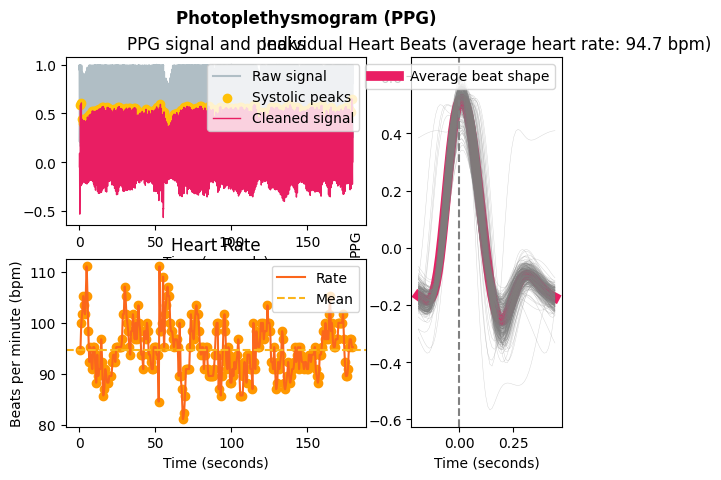

In [ ]:
# nk.ppg_plot(signals, info)
nk.ppg_plot(izmi_tkr_minmax_seg_signals, izmi_tkr_minmax_seg_info)

In [ ]:
# ppg_nebian = nk.ppg_clean(novi_tkr_preprocess_minmax_ppg, sampling_rate=250, method='nabian2018')
# ppg_elgendi = nk.ppg_clean(novi_tkr_preprocess_minmax_ppg, sampling_rate=250, method='elgendi')
# pd.DataFrame({'ppg_elgendi': ppg_elgendi,'ori': novi_tkr_preprocess_minmax_ppg}).plot()

In [ ]:
# peaks, info = nk.ppg_peaks(path_minmax_ppg, sampling_rate=250, method="elgendi", show=True)

In [ ]:
# ppg_epochs = nk.ppg_segment(path_minmax_ppg, sampling_rate=100, show=True)

# aa


In [ ]:
# nk.cite()

In [ ]:
# nk.ppg_

In [ ]:
izmi_tkr_minmax_seg_analyze

,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,94.715839,633.617021,33.423341,10.940468,32.168652,NaN,NaN,NaN,NaN,25.596096,...,1.842532,3.733662,1.068065,1.60413,1.30148,2.323862,1.659934,1.70656,2.698878,0.779319


In [ ]:
# ppg_nebian = nk.ppg_clean(silvia_minmax_seg, sampling_rate=100, method='nabian2018')
# ppg_elgendi = nk.ppg_clean(silvia_minmax_seg, sampling_rate=100, method='elgendi')
# peaks, info = nk.ppg_peaks(ppg_elgendi, sampling_rate=100, method="elgendi", show=False)
# hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
# hrv_time

# buram


## BPM_Elgendi

In [ ]:
bpm_elgendi = [float(alikha_minmax_seg_analyze['PPG_Rate_Mean']),
float(anita_minmax_seg_analyze['PPG_Rate_Mean']),
float(ecak_minmax_seg_analyze['PPG_Rate_Mean']),
float(nasah_minmax_seg_analyze['PPG_Rate_Mean']),
float(nyoman_minmax_seg_analyze['PPG_Rate_Mean']),
float(nyu_minmax_seg_analyze['PPG_Rate_Mean']),
float(puci_minmax_seg_analyze['PPG_Rate_Mean']),
float(roshied_minmax_seg_analyze['PPG_Rate_Mean']),
float(widi_minmax_seg_analyze['PPG_Rate_Mean']),
float(aldi_minmax_seg_analyze['PPG_Rate_Mean']),
float(ary_minmax_seg_analyze['PPG_Rate_Mean']),
float(betari_minmax_seg_analyze['PPG_Rate_Mean']),
float(charisma_minmax_seg_analyze['PPG_Rate_Mean']),
float(deva_minmax_seg_analyze['PPG_Rate_Mean']),
float(faiza_minmax_seg_analyze['PPG_Rate_Mean']),
float(novi_minmax_seg_analyze['PPG_Rate_Mean']),
float(amel_minmax_seg_analyze['PPG_Rate_Mean']),
float(andika_minmax_seg_analyze['PPG_Rate_Mean']),
float(fauzi_minmax_seg_analyze['PPG_Rate_Mean']),
float(kanwa_minmax_seg_analyze['PPG_Rate_Mean']),
float(nandakkn_minmax_seg_analyze['PPG_Rate_Mean']),
float(nanda_minmax_seg_analyze['PPG_Rate_Mean']),
float(pradja_minmax_seg_analyze['PPG_Rate_Mean']),
float(raihan_minmax_seg_analyze['PPG_Rate_Mean']),
float(silvia_minmax_seg_analyze['PPG_Rate_Mean']),
float(hilmy_tkr_minmax_seg_analyze['PPG_Rate_Mean']),
float(rima_tkr_minmax_seg_analyze['PPG_Rate_Mean']),
float(winanda_tkr_minmax_seg_analyze['PPG_Rate_Mean']),
float(izmi_tkr_minmax_seg_analyze['PPG_Rate_Mean']),
]

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\2277932575.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm_elgendi = [float(alikha_minmax_seg_analyze['PPG_Rate_Mean']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\2277932575.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(anita_minmax_seg_analyze['PPG_Rate_Mean']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\2277932575.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(ecak_minmax_seg_analyze['PPG_Rate_Mean']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\2277932575.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.il

## HRV_Elgendi

In [ ]:
hrv_elgendi = [float(alikha_minmax_seg_analyze['HRV_MeanNN']),
float(anita_minmax_seg_analyze['HRV_MeanNN']),
float(ecak_minmax_seg_analyze['HRV_MeanNN']),
float(nasah_minmax_seg_analyze['HRV_MeanNN']),
float(nyoman_minmax_seg_analyze['HRV_MeanNN']),
float(nyu_minmax_seg_analyze['HRV_MeanNN']),
float(puci_minmax_seg_analyze['HRV_MeanNN']),
float(roshied_minmax_seg_analyze['HRV_MeanNN']),
float(widi_minmax_seg_analyze['HRV_MeanNN']),
float(aldi_minmax_seg_analyze['HRV_MeanNN']),
float(ary_minmax_seg_analyze['HRV_MeanNN']),
float(betari_minmax_seg_analyze['HRV_MeanNN']),
float(charisma_minmax_seg_analyze['HRV_MeanNN']),
float(deva_minmax_seg_analyze['HRV_MeanNN']),
float(faiza_minmax_seg_analyze['HRV_MeanNN']),
float(novi_minmax_seg_analyze['HRV_MeanNN']),
float(amel_minmax_seg_analyze['HRV_MeanNN']),
float(andika_minmax_seg_analyze['HRV_MeanNN']),
float(fauzi_minmax_seg_analyze['HRV_MeanNN']),
float(kanwa_minmax_seg_analyze['HRV_MeanNN']),
float(nandakkn_minmax_seg_analyze['HRV_MeanNN']),
float(nanda_minmax_seg_analyze['HRV_MeanNN']),
float(pradja_minmax_seg_analyze['HRV_MeanNN']),
float(raihan_minmax_seg_analyze['HRV_MeanNN']),
float(silvia_minmax_seg_analyze['HRV_MeanNN']),
float(hilmy_tkr_minmax_seg_analyze['HRV_MeanNN']),
float(rima_tkr_minmax_seg_analyze['HRV_MeanNN']),
float(winanda_tkr_minmax_seg_analyze['HRV_MeanNN']),
float(izmi_tkr_minmax_seg_analyze['HRV_MeanNN']),
]

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\3605798967.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv_elgendi = [float(alikha_minmax_seg_analyze['HRV_MeanNN']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\3605798967.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(anita_minmax_seg_analyze['HRV_MeanNN']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\3605798967.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(ecak_minmax_seg_analyze['HRV_MeanNN']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_8000\3605798967.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) in

## DataFrame

In [ ]:
data = {'bpm_elgendi':bpm_elgendi,'hrv_elgendi':hrv_elgendi, 'peakk':peakk}
a = pd.DataFrame(data)
# a.to_csv('a.csv')
# pd.DataFrame(a['bpm_elgendi'])
a

,bpm_elgendi,hrv_elgendi,peakk
0,81.701431,734.713115,0.617141
1,77.204528,782.096070,0.957706
2,85.801897,699.686275,0.657537
3,96.574333,621.631944,0.949899
4,100.994003,594.119601,0.838622
5,67.306115,891.700000,0.791409
6,90.955118,659.778598,0.529261
7,71.750412,836.728972,0.870622
8,105.274218,570.095541,0.639733
9,66.235669,906.192893,0.688232


In [ ]:
amel_pulse_tkr = pd.read_csv("data_awal/amel_pulse_tkr.csv",sep =";")
andika_pulse_tkr = pd.read_csv("data_awal/andika_pulse_tkr.csv",sep =";")
fauzi_pulse_tkr = pd.read_csv("data_awal/fauzi_pulse_tkr.csv",sep =";")
kanwa_pulse_tkr = pd.read_csv("data_awal/kanwa_pulse_tkr.csv",sep =";")
nandakkn_pulse_tkr = pd.read_csv("data_awal/nandakkn_pulse_tkr.csv",sep =";")

def kalidua(path):
    hasil = path*2

    return hasil

amel_pulse_tkr_kalidua = kalidua(amel_pulse_tkr)
andika_pulse_tkr_kalidua = kalidua(andika_pulse_tkr)
fauzi_pulse_tkr_kalidua = kalidua(fauzi_pulse_tkr)
kanwa_pulse_tkr_kalidua = kalidua(kanwa_pulse_tkr)
nandakkn_pulse_tkr_kalidua = kalidua(nandakkn_pulse_tkr)

In [ ]:
import pandas as pd

def baca_dan_kalidua(nama_file):
    data = pd.read_csv(f"data_awal/{nama_file}.csv", sep=";")
    data_kalidua = data * 2
    return data_kalidua

nama_files = ["amel_pulse_tkr", "andika_pulse_tkr", "fauzi_pulse_tkr", "kanwa_pulse_tkr", "nandakkn_pulse_tkr"]

amel_pulse_tkr_kalidua, andika_pulse_tkr_kalidua, fauzi_pulse_tkr_kalidua, kanwa_pulse_tkr_kalidua, nandakkn_pulse_tkr_kalidua = [baca_dan_kalidua(nama) for nama in nama_files]


In [ ]:
import pandas as pd

def baca_dan_kalidua(nama_file):
    df = pd.read_csv("data_awal/" + nama_file + "_pulse_tkr.csv", sep=";")
    df_kalidua = df * 2
    return df_kalidua

nama_file_list = ["amel", "andika", "fauzi", "kanwa", "nandakkn"]

# Membaca dan mengalikan dua data CSV
result_dict = {}
for nama_file in nama_file_list:
    result_dict[nama_file + "_pulse_tkr_kalidua"] = baca_dan_kalidua(nama_file)

# Hasilnya akan tersimpan dalam result_dict

In [ ]:
def kalidua(path):
    a = path*2
    b = a.mean()
    return b

In [ ]:
import pandas as pd
import os

# List nama file CSV
files = ['amel_pulse_tkr', 'andika_pulse_tkr', 'fauzi_pulse_tkr', 'kanwa_pulse_tkr', 'nandakkn_pulse_tkr']

# Membaca file CSV dan mengalikan nilai kolom dengan 2
for file in files:
    file_path = os.path.join('data_awal', f'{file}.csv')
    df = pd.read_csv(file_path, sep=';')
    globals()[f'{file}_kalidua'] = kalidua(df)


In [ ]:
amel_pulse_tkr_kalidua

4001    3913.935151
0        202.020030
dtype: float64